# Проект №3 - Исследовательский анализ данных

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Первичный анализ

In [1]:
#Блок импорта, для работы с библиотеками и модулями

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
#%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

#Снятие ограничений на вывод
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
# открываем файл и изучаем общую структуру
flat_table = pd.read_csv('C:\\Users\\vovlo\\datasets\\real_estate_data.csv', sep='\t')
print(flat_table.info())

flat_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
flat_table_copy_copy = flat_table

In [4]:
#посмотрим на пять произвольных строк
flat_table.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23675,8,3550000.0,39.5,2016-10-03T00:00:00,1,NaN,16.0,19.0,13,NaN,False,False,8.5,NaN,Санкт-Петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,721.0
12117,5,4299000.0,55.8,2017-05-01T00:00:00,3,NaN,5.0,38.5,2,NaN,False,False,5.6,0.0,Санкт-Петербург,11919.0,9967.0,1.0,612.0,1.0,712.0,101.0
8755,1,1350000.0,18.8,2017-11-22T00:00:00,0,2.75,19.0,15.8,1,NaN,True,False,NaN,NaN,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
19537,11,3590000.0,36.7,2018-02-01T00:00:00,1,2.60,16.0,18.3,7,NaN,False,False,8.9,2.0,Санкт-Петербург,48605.0,15783.0,0.0,NaN,0.0,NaN,63.0
4004,5,3600000.0,44.0,2018-09-11T00:00:00,1,2.55,16.0,17.0,12,NaN,False,False,10.0,NaN,Санкт-Петербург,18446.0,21871.0,0.0,NaN,2.0,924.0,8.0


* <font color="green">total_images — число фотографий квартиры в объявлении ___(int64)___</font>
* <font color="green">last_price — цена на момент снятия с публикации  ___(float64)___</font>
* <font color="green">total_area — площадь квартиры в квадратных метрах  ___(float64)___</font>
* <font color="red">first_day_exposition — дата публикации  ___(type date)___</font>
    * Тип должен быть - дата: Год-Месяц-Число;
* <font color="green">rooms — число комнат ___(int64)___</font>
* <font color="green">ceiling_height — высота потолков (м) ___(float64)___</font>
* <font color="red">floors_total — всего этажей в доме ___(int64)___ </font>
    * Количество этажей не может быть отрицательным значением, где тип: целочисленный;
* <font color="green">living_area — жилая площадь в квадратных метрах(м²) ___(float64)___</font>
* <font color="green">floor — этаж ___(int64)___</font>
* <font color="red">is_apartment — апартаменты (булев тип) ___(bool)___</font>
    * Дожен быть булев тип;
* <font color="green">studio — квартира-студия (булев тип) ___(bool)___</font>
* <font color="green">open_plan — свободная планировка (булев тип) ___(bool)___</font>
* <font color="green">kitchen_area — площадь кухни в квадратных метрах (м²) ___(float64)___</font>
* <font color="red">balcony — число балконов___(int64)___</font>
    * Только целочисленное значение
* <font color="green">locality_name — название населённого пункта ___(text)___</font>
* <font color="green">airports_nearest — расстояние до ближайшего аэропорта в метрах (м) ___(float64)___</font>
* <font color="green">cityCenters_nearest — расстояние до центра города (м) ___(float64)___</font>
* <font color="green">parks_nearest — расстояние до ближайшего парка (м) ___(float64)___</font>
* <font color="red">parks_around3000 — число парков в радиусе 3 км ___(int64)___</font>
    * Только целочисленный тип, т.к. отрицательного и дробного количества балконов быть не может
* <font color="green">ponds_around3000 — число водоёмов в радиусе 3 км ___(int64)___</font>
* <font color="green">ponds_nearest — расстояние до ближайшего водоёма (м)___(float64)___</font>
* <font color="red">days_exposition — сколько дней было размещено объявление (от публикации до снятия)___(int64)___</font>
    * Только целочисленный тип

##### Вывод: 
У выделенных красным цветом признаков, требуется изменить тип данных. Исследование причин появления пропусков будут в следующем разделе.

### Шаг 2. Предобработка данных

#### Удалим явные дубликаты, пустые строки и избавимся от пропусков
##### Рассмотрим явные дубликаты строк

In [5]:
flat_table.duplicated().sum()

0

##### Вывод:
Явных дубликатов нет, после удаления пропусков нужно проверить на наличие регистровых дублей.

##### Проведём проверку на наличие пропусков

In [6]:
flat_table.isnull().sum()
#поиск None
#print('\nКоличество None', flat_table.loc[flat_table['ceiling_height'] == 'None']['ceiling_height'].count())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

На основании проверки на пропуски, требуется провести детальный анализ каждого признака при этом совместив работу по смене типа.

Напишем функции
1. первая функция позволит выводить информационный текст - отсотированный список столбцов, в которых имеются пропуски;
2. вторая функция ищет во всей таблице пропуски
3. третья - устраняет Nan и изменяет тип данных

In [7]:
def search_nan(data, parametr=''):
    if parametr == '':
        series_null_list =[]
        series_null = data.isnull().sum().sort_values(ascending=False)
        for i in series_null.index:
            if series_null[i] > 0:
                print('В столбце -', i, '- пропущено:', series_null[i], ';')
                series_null_list.append(i)
        print()
    elif parametr != '':
        if data[parametr].isnull().sum() > 0:
            print('В столбце -', parametr, '- пропущено:', data[parametr].isnull().sum(), ';')
        else:
            print('нет пропусков')
    #return series_null_list
    print()
    

            
def search_none(data):
    problem =[]
    for column in flat_table.columns:
        if flat_table.loc[flat_table[column] == 'None'][column].count() > 0:
            print('None обнаружен в столбце - ', column, '- в количестве', flat_table.loc[flat_table[column] == 'None'][column].count())
            problem.append(column)
    if  len(problem) == 0:
        print('None пропусков нет в таблице')
    print()
    
    
def fill_nan_and_type(data, series, values=0, type_v=''):
    try:
        data[series].fillna(values, inplace=True)
        if type_v == 'int64' or type_v == 'float64':
            pd.to_numeric(flat_table[series], errors='coerce' )
        #pd.to_numeric(flat_table['balcony'], errors='coerce' )
        #pd.to_numeric(flat_table['parks_around3000'], errors='coerce' )
        #pd.to_numeric(flat_table['days_exposition'], errors='coerce' )
        data[series] = data[series].astype(type_v)
        flat_table[series].plot(kind='hist')
        plt.show()
    except:
        print('преобразование уже сделано')
        
    

Проверим dataframe на наличие __None__

In [8]:
search_none(flat_table)

None пропусков нет в таблице



Исследуем пропуски, и будем действовать по порядку - сначала с самым большим обёмом пропусков

In [9]:
search_nan(flat_table)  

В столбце - is_apartment - пропущено: 20924 ;
В столбце - parks_nearest - пропущено: 15620 ;
В столбце - ponds_nearest - пропущено: 14589 ;
В столбце - balcony - пропущено: 11519 ;
В столбце - ceiling_height - пропущено: 9195 ;
В столбце - airports_nearest - пропущено: 5542 ;
В столбце - cityCenters_nearest - пропущено: 5519 ;
В столбце - parks_around3000 - пропущено: 5518 ;
В столбце - ponds_around3000 - пропущено: 5518 ;
В столбце - days_exposition - пропущено: 3181 ;
В столбце - kitchen_area - пропущено: 2278 ;
В столбце - living_area - пропущено: 1903 ;
В столбце - floors_total - пропущено: 86 ;
В столбце - locality_name - пропущено: 49 ;




In [10]:
about_flat_table = flat_table[['is_apartment',\
            'parks_nearest',\
            'locality_name',\
            'balcony',\
            'ceiling_height',\
            'airports_nearest',\
            'cityCenters_nearest',\
            'parks_around3000',\
            'ponds_around3000',\
            'days_exposition','kitchen_area','living_area','floors_total','locality_name']]
#Общая статистическая картина по проблемным признакам
about_flat_table.describe()

,parks_nearest,balcony,ceiling_height,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,kitchen_area,living_area,floors_total
count,8079.000000,12180.000000,14504.000000,18157.000000,18180.000000,18181.000000,18181.000000,20518.000000,21421.000000,21796.000000,23613.000000
mean,490.804555,1.150082,2.771499,28793.672193,14191.277833,0.611408,0.770255,180.888634,10.569807,34.457852,10.673824
std,342.317995,1.071300,1.261056,12630.880622,8608.386210,0.802074,0.938346,219.727988,5.905438,22.030445,6.597173
min,1.000000,0.000000,1.000000,0.000000,181.000000,0.000000,0.000000,1.000000,1.300000,2.000000,1.000000
25%,288.000000,0.000000,2.520000,18585.000000,9238.000000,0.000000,0.000000,45.000000,7.000000,18.600000,5.000000
50%,455.000000,1.000000,2.650000,26726.000000,13098.500000,0.000000,1.000000,95.000000,9.100000,30.000000,9.000000
75%,612.000000,2.000000,2.800000,37273.000000,16293.000000,1.000000,1.000000,232.000000,12.000000,42.300000,16.000000
max,3190.000000,5.000000,100.000000,84869.000000,65968.000000,3.000000,3.000000,1580.000000,112.000000,409.700000,60.000000


##### Вывод
Чтобы понять можем ли мы заменить Nan на нули, посмотрим откуда могут идти данные по данным признакам:
 * ___'is_apartment'___ - это булев тип данных, проставляется клиентом при занесении данных в форму, в данном случае нужно для пропущенных значений указать 0. Что означает, что данный вид жилья не является апартаментами.
     * замена Nan на 0
 * ___'parks_nearest'___ -это расстояние до ближайшего парка, расстояние должно вычисляться автоматически на основании введенного адреса. Пропуски могут быть связаны с некорректной работой алгоритма по поиск павков на основе картографических данных, вторым вариантом может быть, что пользователь неправильно ввёл адрес(сложно предположить специально или невзначай, скорее второе, но это отдельное исследование), замену лучше сделать на основе медианного значения по группе населенных пунктов.
     * замена на медиану, требуется доп.анализ
 * ___'ponds_nearest'___ - это расстояние до ближайшего водоёма, такого рада данные можно вычислить автоматически на основании адреса, поэтому пропуск здесь можно интерпретировать как ошибку поиска (техническая) на основании адреса,т.е. из-за неправильного адреса (введён с ошибкой). Заменять Nan на 0 нельзя, лучше избавиться от шумов и взять среднюю ведличину.
     * замена на среднее/медиану/мода - требуется дополнительный анализ
 * ___'balcony'___ - количество балконов. В обчной квартире балкон либо есть, либо нет, но возможны случаи с несколькими. Поэтому пропуски правельнее будет обнулить, но также отправить отделу тех.поддержки запрос на проверку не было проблем с формой ввода информации, т.к. существование балкона может повлиять на интерес клиентом предложения по жилью.
     * замена Nan на 0
     * запрос в тех.поддержку о возможных проблемах
 * ___'ceiling_height'___ - высота потолков. Если значение пропущено, то вероятнее всего клиент не имел на момент ввода данных данного параметра. Поэтому правильнее вначале заменить на 0 или другое временное решение, а затем провести проверку и выбрать замену по медиане, среднему или моде.
     * замена на среднее/медиану/мода - требуется дополнительный анализ
 * __'airports_nearest'__ - расстояние до ближайшего аэропорта в метрах. Пропуск в данных может означать некорректный ввод пользователя в адреса, нужно проверить связаны ли проблемы с автозаполнением картографических признаков друг с другом.
    
     * замена на среднее/медиану/мода - требуется дополнительный анализ
 * __'cityCenters_nearest'__ - расстояние до центра города, автоматичесоке определение на основе адреса. Заменять на ноль неправильно, лучше на моду/среднее/медиану, но только после доп.анализа
   
     * замена на среднее/медиану/мода - требуется дополнительный анализ
 * __'parks_around3000'__ число парков, автозаполняемый признак
     * замена на среднее/медиану/мода - требуется дополнительный анализ
     * запрос в тех.поддержку о возможных проблемах
 * __'ponds_around3000'__ - число водоёмов, автозаполняемый признак
     * ззамена на среднее/медиану/мода - требуется дополнительный анализ
     * запрос в тех.поддержку о возможных проблемах
 * ___'days_exposition'___ - длительность размещения объявления, заменить на 0 можно. Т.к.если нет данных по длительности объявления, то объявление не было, его сняли.
     * замена Nan на 0
     * требуется до.анализ
 * ___'kitchen_area'___ - площадь кухни, нужен доп.анализ
     * требуется до.анализ
 * ___'living_area'___  - жилая площадь, не может быть нулевой необходимо понять сущность проблемы
     * требуется до.анализ
 * ___'floors_total'___ - количество этажей, пропуск можно трактовать как отсутствие этажности в доме, но требуется дополнительный анализ
     * требуется до.анализ
 * ___'locality_name'___ - название населённого пункта, заменять на 0 нельзя. Это клиентские данные, если данных по данному поля нет, это может означать ошибку при вводе данных
     * удалить строки с этими данными

##### Замена типа 'is_apartment'


In [11]:
#Посмотрим какие уникальные значения в данном признаке
print('Виды значений: ',flat_table['is_apartment'].unique())

#вызовем функцию и проверим количество пропусков
search_nan(flat_table, 'is_apartment')

fill_nan_and_type(flat_table, 'is_apartment', 0, 'bool')
#flat_table.info()

Виды значений:  [nan False True]
В столбце - is_apartment - пропущено: 20924 ;

преобразование уже сделано


##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
     
##### Следующее 
 * <font color = 'red'>___'parks_nearest'___</font>
 * <font color = 'red'>___'ponds_nearest'___</font>
 
#### Замена типа 'ponds_nearest'

In [12]:
flat_table['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [13]:
pivot_park = flat_table.pivot_table(index='locality_name', values='parks_nearest', aggfunc='median')
pivot_park

,parks_nearest
locality_name,
Зеленогорск,147.5
Колпино,393.0
Красное Село,428.5
Кронштадт,293.0
Ломоносов,407.0
Павловск,312.0
Петергоф,294.0
Пушкин,399.5
Санкт-Петербург,460.0


Можно сделать вывод по describe и pivot_table, что алгоритм находит парки только для данных населённых пунктов, соответственно можно предположить, что в поисковом алгоритме есть ограничение по дальности равное порядка 3 км, что странно, т.к. есть специальный признак для этого. Спросить бы коллег... Думаю лучшим вариантом будет на месте пропусков поставить медианное значение по групе, если оно имеется, в противном случае медианное по всему столбцу. 

In [14]:
local = flat_table.locality_name.unique()
dict_park = {}
med = flat_table['parks_nearest'].median()

flat_table.parks_nearest = flat_table.parks_nearest.fillna(0) 

#заполняет словарь группы медианными значениями
for i in local:
    if i in pivot_park.index:
        dict_park[i] = pivot_park.loc[i,'parks_nearest']
    else:
        dict_park[i] = med
  
        
#оптимизированная функция   
def func_park(row):
    if row.parks_nearest == 0:
        row.parks_nearest = dict_park[row.locality_name]
        return row.parks_nearest
    else:
        return row.parks_nearest
    
#замена по медианным значениям группы 
flat_table.parks_nearest = flat_table.apply(func_park, axis = 1)

In [15]:
flat_table['parks_nearest'].describe()

count    23699.000000
mean       470.630343
std        203.626263
min          1.000000
25%        455.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'parks_nearest'___</font>    
##### Следующее 
 
 * <font color = 'red'>___'ponds_nearest'___</font>
 
##### Замена типа 'ponds_nearest'

,ponds_nearest
count,9110.000000
mean,517.980900
std,277.720643
min,13.000000
25%,294.000000
50%,502.000000
75%,729.000000
max,1344.000000


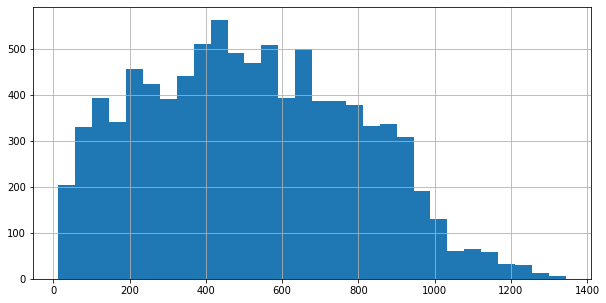

In [16]:
flat_table['ponds_nearest'].hist(bins=30)
flat_table[['ponds_nearest']].describe()

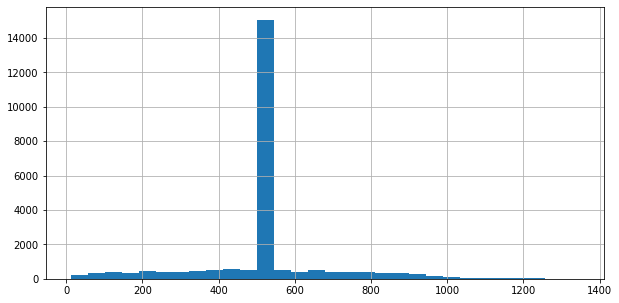

In [17]:
flat_table['ponds_nearest'].fillna(flat_table['ponds_nearest'].median(), inplace=True)
flat_table['ponds_nearest'].hist(bins=30)

##### Вывод
Гистограмма сильно исказалась после простановки записям с Nan медианного значения. Правильнее было бы сделать замену на по медиане населенных пунктов, но код стал очень тормазить и проверку сложно делать.

##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'parks_nearest'___</font>   
 * <font color = 'green'>___'ponds_nearest'___</font>
    
##### Следующий
     
 * <font color = 'red'> ___'balcony'___ - количество балконов. В обчной квартире балкон либо есть, либо нет, но возмоы случаи с несколькими. Поэтому пропуски правельнее будет заменить на 0, но также отправить отделу тех.поддержки запрос на проверку не было проблем с формой ввода информации.
     * замена Nan 0
     * запрос в тех.поддержку о возможных проблемах</font>
     
#### Замена типа 'balcony'

,balcony
count,12180.000000
mean,1.150082
std,1.071300
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


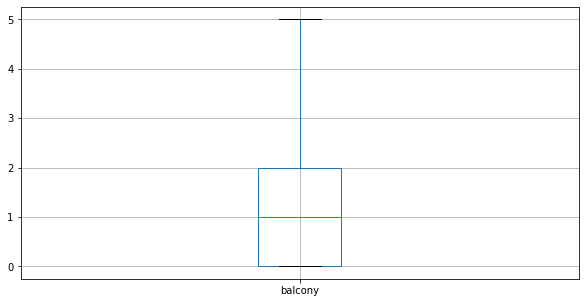

In [18]:
flat_table.boxplot(column=['balcony'])
flat_table[['balcony']].describe()

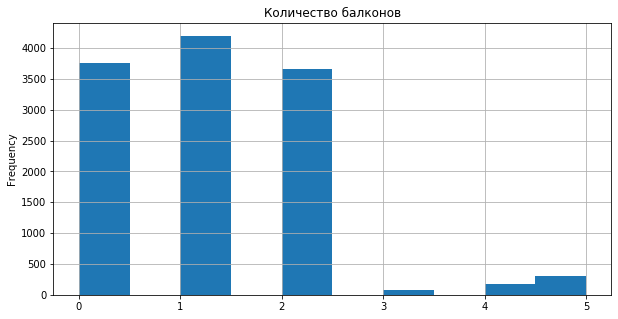

In [19]:
flat_table['balcony'].plot(kind='hist', grid=True, title ='Количество балконов')

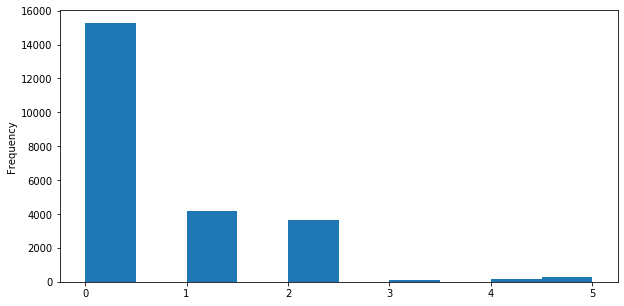

In [20]:
fill_nan_and_type(flat_table, 'balcony', 0, 'int64')

 ##### Вывод
Гистограмма приняла вид пуасонова распределения. В данном случае замена на 0 будет лучшим решением.

##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'parks_nearest'___</font> 
 * <font color = 'green'>___'ponds_nearest'___</font>
 * <font color = 'green'>___'balcony'___</font>   

##### Следующий
 
   

 * <font color = 'red'>___'ceiling_height'___ - высота потолков. Если значение пропущено, то вероятнее всего клиент не имел на момент ввода данных данного параметра. Поэтому правильнее вначале заменить на ноль, а затем провести проверку и выбрать замену по медиане, среднему или моде.</font>
     * замена на среднее/медиану/мода - требуется дополнительный анализ
 * <font color = 'red'>__'airports_nearest'__ - расстояние до ближайшего аэропорта в метрах. Пропуск в данных может означать некорректный ввод пользователя в адрес.
    
     * замена на среднее/медиану/мода - требуется дополнительный анализ</font>
     
#### Замена типа 'ceiling_height'

       ceiling_height
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000


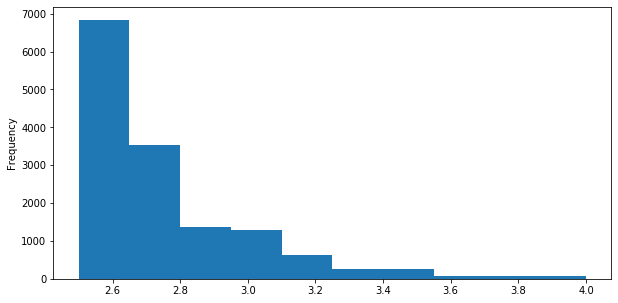

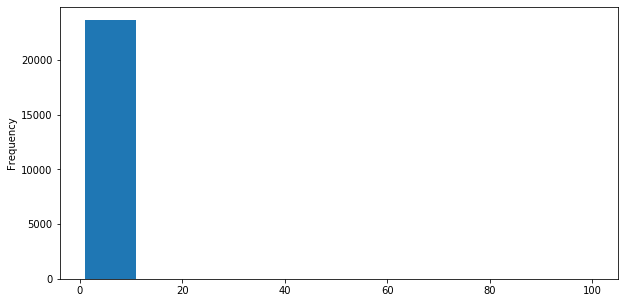

       ceiling_height
count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Странная высота потолков у записей -  36


In [21]:
print(flat_table[['ceiling_height']].describe())
flat_table['ceiling_height'].plot(kind='hist', range=(2.5,4))
plt.show()
fill_nan_and_type(flat_table, 'ceiling_height', flat_table.ceiling_height.median(), 'float64')
print(flat_table[['ceiling_height']].describe())
print('Странная высота потолков у записей - ', flat_table[flat_table['ceiling_height'] > 5]['ceiling_height'].count())

In [22]:
#Странные записи лучше отредактировать, за максимальное принято значение 4
#flat_table[flat_table['ceiling_height'] > 4].head()
flat_table.loc[flat_table['ceiling_height'] > 4, 'ceiling_height'] = 4
print(flat_table[['ceiling_height']].describe())

       ceiling_height
count    23699.000000
mean         2.697324
std          0.217700
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000


 ##### Вывод
Гистограмма приняла вид пуасонова распределения. В данном случае замена на 0 будет лучшим решением. Значения явно выделяющиеся от общей выборки приравнены максимальному значению.

##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'ponds_nearest'___</font>
 * <font color = 'green'>___'balcony'___</font>   
 * <font color = 'green'>___'ceiling_height___'</font>
##### Следующий

 * <font color = 'red'>__'airports_nearest'__ - расстояние до ближайшего аэропорта в метрах. Пропуск в данных может означать некорректный ввод пользователя в адрес.
    
     * замена на среднее/медиану/мода - требуется дополнительный анализ</font>
     
#### Замена типа 'airports_nearest'

In [23]:
flat_table['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [24]:
flat_table[flat_table['airports_nearest'] == 84869]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9640,8,4200000.0,51.4,2014-12-10T00:00:00,2,2.55,5.0,31.0,2,False,False,False,6.0,1,посёлок Молодёжное,84869.0,65968.0,0.0,455.0,0.0,502.0,1194.0


Если проанализировать карту Ленинградской области, то получаем, что самое большое расстояние до аэропорта порядка 337 км или 337000 метров. Расстояние не может быть равно 0, т.к. это аэропорт. Возможная проблема - некорректная работа алгоритма, т.к. если бы было Nan тогда можно было бы сослаться на некорректный адрес. Данную запись  можно убрать или проставить корректное значение, самое главное, если мы знаем адес проверить его и возможно сообщить о проблеме в ServiseDesk.

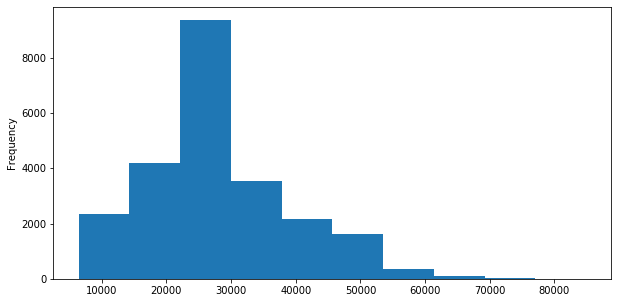

In [25]:
flat_table.loc[flat_table['airports_nearest'] == 0, 'airports_nearest'] = flat_table['airports_nearest'].median()
fill_nan_and_type(flat_table, 'airports_nearest', flat_table.airports_nearest.median(), 'int64')

##### Вывод
От нулевых значений и Nan избавились, путем простановки медианного значения. Максимальное значение не выходит за рамки допустимого расстояния. (данные из Яндекс.Карта по Ленинградской области)

##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'ponds_nearest'___</font>
 * <font color = 'green'>___'balcony'___</font>   
 * <font color = 'green'>___'ceiling_height___'</font>
 * <font color = 'green'>___'airports_nearest'___</font>
##### Следующий
<font color='red'>
 * __'cityCenters_nearest'__</font>
 
#### Замена типа 'cityCenters_nearest'

In [26]:
flat_table['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [27]:
pivot = flat_table.pivot_table(index=['locality_name'], values=['cityCenters_nearest'], aggfunc='median')
dict_space = {}
flat_table['cityCenters_nearest'].fillna(0,inplace=True)
med = flat_table['cityCenters_nearest'].median()

#словарь сопоставлений по локации
for i in flat_table['locality_name'].unique():
    if i in pivot.index:
        dict_space[i] = pivot.loc[i,'cityCenters_nearest']
    else:
        dict_space[i] = med

#оптимизированная функция   
def func(row):
    if row.cityCenters_nearest == 0:
        row.cityCenters_nearest = dict_space[row.locality_name]
        return row.cityCenters_nearest
    else:
        return row.cityCenters_nearest        
#замена
flat_table.cityCenters_nearest = flat_table.apply(func, axis = 1)    

In [28]:
flat_table['cityCenters_nearest'].describe()

count    23699.000000
mean     13552.355753
std       7683.593237
min        181.000000
25%      10927.000000
50%      11348.000000
75%      15319.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [29]:
flat_table['cityCenters_nearest'].describe()

count    23699.000000
mean     13552.355753
std       7683.593237
min        181.000000
25%      10927.000000
50%      11348.000000
75%      15319.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [30]:
pd.to_numeric(flat_table['balcony'], errors = 'coerce')
flat_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### Вывод
Для того, чтобы максимально точно заменить Nan, произвёл замену на основе медианных значений населённых пунктов. В случаях, когда нет данных по населенным пунктам проставленно медианное значение по всему столбцу.

Необходимо проверить гипотезу о том, что некоторые населенные пункты неправильно определяются при автоматическом поиске по картографическим данным.


##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'ponds_nearest'___</font>
 * <font color = 'green'>___'balcony'___</font>   
 * <font color = 'green'>___'ceiling_height___'</font>
 * <font color = 'green'>___'airports_nearest'___</font>
 * <font color = 'green'>___'cityCenters_nearest'___</font>
##### Следующий
<font color='red'>
 * __'parks_around3000'__ число парков
     * замена Nan на 0
     * запрос в тех.поддержку о возможных проблемах</font>
 
#### Замена типа и значений 'parks_around3000'


count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


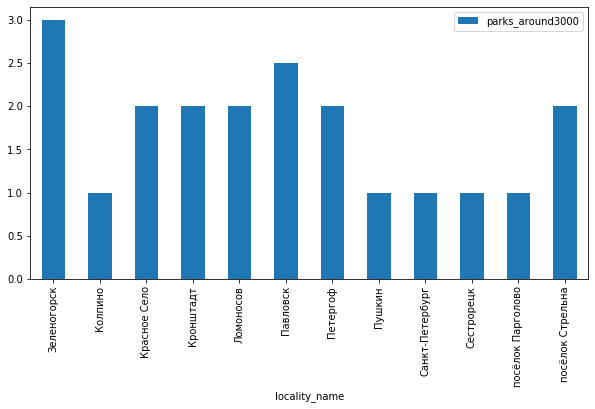

In [31]:
print(flat_table['parks_around3000'].describe())
flat_table.query('parks_around3000 > 0').pivot_table(index='locality_name',values='parks_around3000', aggfunc='median').plot(kind='bar')

Соответственно, если недвижимость будет продаваться в населённом пункте, где медианное значение не равно 0, то будем подставлять медианное значение этой группы, в противном случае 0

In [32]:
# группировка по локации, агрегация по медиане количества парков
pivot = flat_table.pivot_table(index=['locality_name'],\
                       values=['parks_around3000'],\
                       aggfunc='median')
# пустой словарь для записи медианных значений по локациям
dict_space = {}
med = flat_table['parks_around3000'].median()
# заполним пустые строки значением 100, которого нет в столбце
flat_table['parks_around3000'].fillna(999,inplace=True)

#запишем данные в словарь
for i in flat_table['locality_name'].unique():
    if i in pivot.index:
        dict_space[i] = pivot.loc[i,'parks_around3000']
    else:
        dict_space[i] = med
        
# функция для замены значений в столбце parks_around3000 на медианное значение по локации,
# если для данной локации не было найдено ни одного значения, то записываться будет медианное значение столбца

#оптимизированная функция   
def func(row):
    if row.parks_around3000 == 999:
        row.parks_around3000 = dict_space[row.locality_name]
        return row.parks_around3000
    else:
        return row.parks_around3000 
        
flat_table.parks_around3000 = flat_table.apply(func, axis = 1)

In [33]:
flat_table['parks_around3000'].describe()

count    23699.000000
mean         0.469134
std          0.748593
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [34]:
flat_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### Вывод



##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'ponds_nearest'___</font>
 * <font color = 'green'>___'balcony'___</font>   
 * <font color = 'green'>___'ceiling_height___'</font>
 * <font color = 'green'>___'airports_nearest'___</font>
 * <font color = 'green'>___'cityCenters_nearest'___</font>
 * <font color = 'green'>___'parks_around3000'___</font>
 
##### Следующий

* <font color='red'>___'ponds_around3000'___ - число водоёмов</font>

 
#### Замена типа и значений 'ponds_around3000'


count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


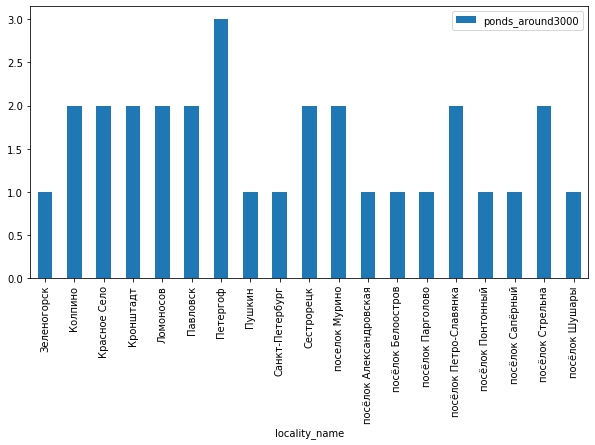

In [35]:
print(flat_table['ponds_around3000'].describe())
flat_table.query('ponds_around3000 > 0').pivot_table(index='locality_name',values='ponds_around3000', aggfunc='median').plot(kind='bar')

In [36]:
pivot = flat_table.pivot_table(index=['locality_name'], values=['ponds_around3000'], aggfunc='median')
dict_space = {}
med = flat_table['ponds_around3000'].median()
flat_table['ponds_around3000'].fillna(999,inplace=True) 

for i in flat_table['locality_name'].unique():
    if i in pivot.index:
        dict_space[i] = pivot.loc[i,'ponds_around3000']
    else:
        dict_space[i] = med
        
def func_ponds(row):
    if row.ponds_around3000 == 999:
        row.ponds_around3000 = dict_space[row.locality_name]
        return row.ponds_around3000
    else:
        return row.ponds_around3000
        

flat_table.ponds_around3000 = flat_table.apply(func_ponds, axis = 1)

In [37]:
flat_table.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603.0,0.0,455.0,0.0,502.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098.0,2.0,112.0,1.0,48.0,121.0


In [38]:
flat_table['ponds_around3000'].describe()

count    23699.000000
mean         0.823959
std          0.829186
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [39]:
#Сделаем срез и проверим наш dataframe
flat_table.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603.0,0.0,455.0,0.0,502.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098.0,2.0,112.0,1.0,48.0,121.0


##### Вывод



##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'ponds_nearest'___</font>
 * <font color = 'green'>___'balcony'___</font>   
 * <font color = 'green'>___'ceiling_height___'</font>
 * <font color = 'green'>___'airports_nearest'___</font>
 * <font color = 'green'>___'cityCenters_nearest'___</font>
 * <font color = 'green'>___'parks_around3000'___</font>
 * <font color = 'green'>___'ponds_around3000'___</font>
 
##### Следующий
 * <font color = 'red'>___'first_day_exposition'___</font>

##### Замена типа и Nan в 'first_day_exposition'

In [40]:
print("Краткое описание признака - 'first_day_exposition'")
print()
print(flat_table['first_day_exposition'].describe())
#Конвертация даты, часы/минуты/секунды не учитываем, т.к. точность предоставленных данных до признака
flat_table['first_day_exposition'] = pd.to_datetime(flat_table['first_day_exposition'], format = '%Y-%m-%d')
#print(flat_table.info())
flat_table.head()

Краткое описание признака - 'first_day_exposition'

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603.0,0.0,455.0,0.0,502.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098.0,2.0,112.0,1.0,48.0,121.0


##### Вывод



##### Готово
 * <font color = 'green'>___'is_apartment'___</font>
 * <font color = 'green'>___'ponds_nearest'___</font>
 * <font color = 'green'>___'balcony'___</font>   
 * <font color = 'green'>___'ceiling_height___'</font>
 * <font color = 'green'>___'airports_nearest'___</font>
 * <font color = 'green'>___'cityCenters_nearest'___</font>
 * <font color = 'green'>___'parks_around3000'___</font>
 * <font color = 'green'>___'ponds_around3000'___</font>
 * <font color = 'green'>___'first_day_exposition'___</font> 
 
##### Следующий

 * <font color = 'red'> ___'kitchen_area'___ - площадь кухни </font> 
 * <font color = 'red'> ___'living_area'___  - жилая площадь </font> 

##### Замена типа 'kitchen_area'

In [41]:
flat_table['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Возможно площадь кухни коррелируется с количеством комнат, общей площадью квартиры, апартаментами

In [42]:
flat_table.query('kitchen_area > 0 and rooms > 0').loc[:,('kitchen_area', 'rooms', 'is_apartment', 'living_area')].corr()

,kitchen_area,rooms,is_apartment,living_area
kitchen_area,1.000000,0.269945,0.049034,0.428674
rooms,0.269945,1.000000,-0.004739,0.850558
is_apartment,0.049034,-0.004739,1.000000,0.025601
living_area,0.428674,0.850558,0.025601,1.000000


In [43]:
corr_flat_table = flat_table.corr()
corr_flat_table[['kitchen_area']].query('kitchen_area > 0.5 or kitchen_area < -0.5')

,kitchen_area
last_price,0.519869
total_area,0.609121
kitchen_area,1.000000


На основе корреляционного анализа можно сделать вывод, что есть зависимость у площади кухни только с общей площадью и ценой(в меньшей степени)

In [44]:
flat_table['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [45]:
def func_area(row):
    s = row['total_area']
    if s <= 12:
        row['new_area'] = 'q1'
        return row
    elif 12 <s <=52:
        row['new_area'] = 'q2'
        return row
    elif 52 < s <= 69:
        row['new_area'] = 'q3'
        return row
    else:
        row['new_area'] = 'q4'
        return row
    
flat_table['new_area'] = flat_table['total_area']    
flat_table = flat_table.apply(func_area, axis = 1)
pivot_k = flat_table.pivot_table(index='new_area',values='kitchen_area',aggfunc=['median'])
pivot_k



,median
,kitchen_area
new_area,
q2,8.0
q3,9.0
q4,13.0


In [46]:
pivot = flat_table.pivot_table(index=['new_area'], values=['kitchen_area'], aggfunc='median')
dict_space = {}
med = flat_table['kitchen_area'].median()
flat_table['kitchen_area'].fillna(999,inplace=True)

for i in flat_table['new_area'].unique():
    if i in pivot.index:
        dict_space[i] = pivot.loc[i,'kitchen_area']
    else:
        dict_space[i] = med
        

def func(row):
    if row['kitchen_area'] == 999:
        row['kitchen_area'] = dict_space[i]
        return row.kitchen_area
    else:
        return row.kitchen_area
    
flat_table.kitchen_area = flat_table.apply(func, axis = 1)

In [47]:
flat_table['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

 * ___'living_area'___  - жилая площадь, не может быть нулевой необходимо понять сущность проблемы
     * требуется до.анали
 * ___'floors_total'___ - количество этажей, пропуск можно трактовать как отсутствие этажности в доме.
     * замена Nan на 0
 * ___'locality_name'___ - название населённого пункта, заменять на 0 нельзя. Это клиентские данные, если данных по данному поля нет, это может означать ошибку при вводе данных
     * замена на среднее/медиану/мода

In [48]:
flat_table['living_area'].fillna(flat_table['total_area'],inplace=True)
flat_table['floors_total'].fillna(999,inplace=True)
flat_table.loc[:, ('living_area','floors_total','locality_name')].query('living_area != 999 and floors_total != 999').describe()

,living_area,floors_total
count,23613.000000,23613.000000
mean,36.756771,10.673824
std,25.895668,6.597173
min,2.000000,1.000000
25%,19.000000,5.000000
50%,31.000000,9.000000
75%,44.000000,16.000000
max,631.000000,60.000000


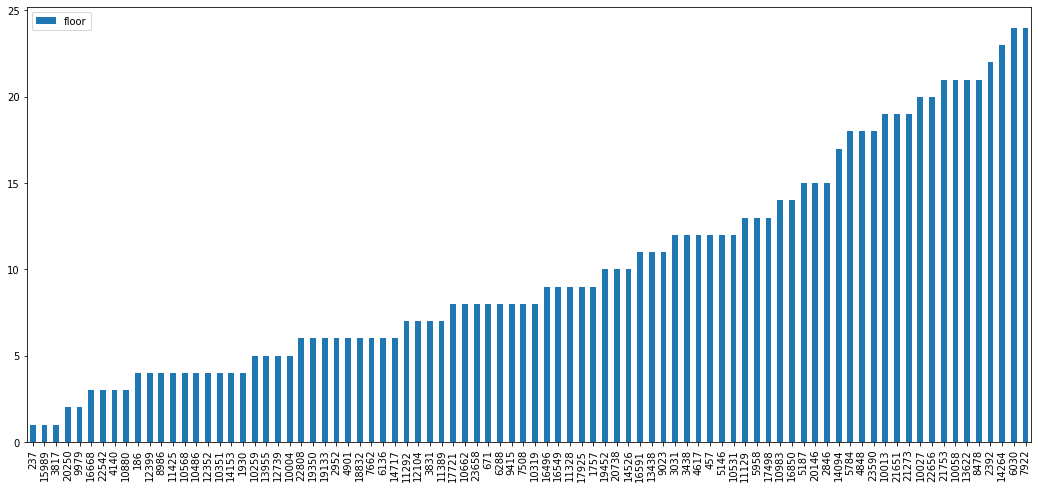

In [49]:
(flat_table.query('floors_total == 999')
 .sort_values(by='floor', ascending = True)
 .plot(kind='bar', y='floor', figsize=(18,8))
)

На срезе видно, что пропуск в общем количестве не означает , что в доме нет этажности, наоборот указывает на проблему, когда при указании этажности не знали этажность дома в целом. Ставить нулевое значение некорректно, нужно разбить по группам и проставить медианную этажность.

In [50]:
flat_table_corr = flat_table.corr() #.query('floors_total > 0.5 or floors_total < -0.5')
flat_table_corr[['floors_total']].sort_values(by='floors_total')

,floors_total
total_images,-0.045352
rooms,-0.032897
ceiling_height,-0.018597
balcony,-0.015034
ponds_around3000,-0.013765
parks_around3000,-0.012194
is_apartment,-0.005660
days_exposition,-0.005414
ponds_nearest,-0.004749
total_area,-0.004646


In [51]:
#Корелляционной связи не наблюдается. 

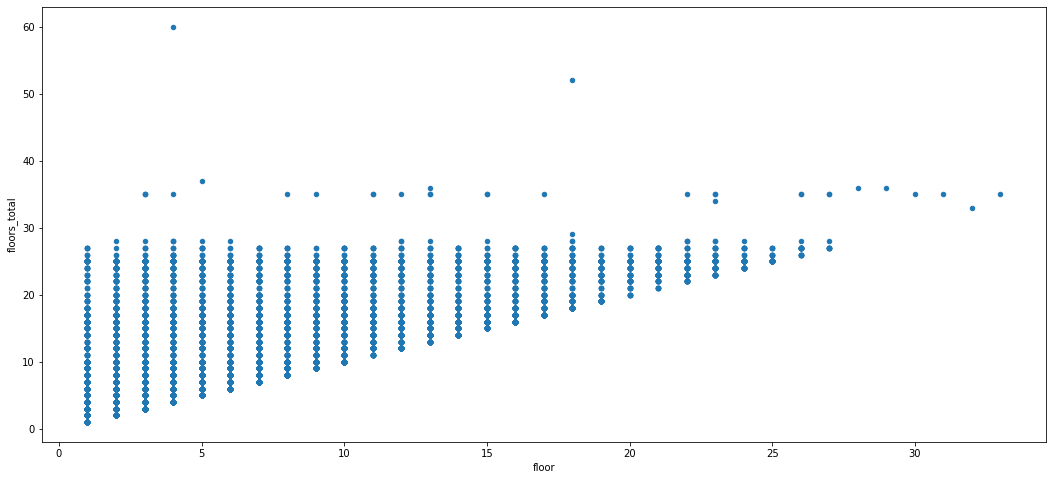

In [52]:
(flat_table.query('floors_total != 999')
 .sort_values(by='floors_total', ascending = True)
 .plot(kind='scatter', y='floors_total', x= 'floor', figsize=(18,8)))

In [53]:
flat_table['floors_total'] = flat_table['floors_total'].fillna(999)
flat_table[flat_table['floors_total'] == 999]['floors_total'].count()
flat_table = flat_table.query('floors_total != 999') 
flat_table[flat_table['floors_total'] == 999]['floors_total'].count()       

0

In [54]:
flat_table.loc[:,['living_area', 'total_area','floors_total']].corr()

,living_area,total_area,floors_total
living_area,1.000000,0.899905,-0.138197
total_area,0.899905,1.000000,-0.075774
floors_total,-0.138197,-0.075774,1.000000


In [55]:
flat_table['living_area'].describe()

count    23613.000000
mean        36.756771
std         25.895668
min          2.000000
25%         19.000000
50%         31.000000
75%         44.000000
max        631.000000
Name: living_area, dtype: float64

In [56]:
search_nan(flat_table)

В столбце - days_exposition - пропущено: 3172 ;
В столбце - locality_name - пропущено: 48 ;




In [57]:
flat_table.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028.0,1.0,482.0,2.0,755.0,NaN,q4
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603.0,0.0,455.0,0.0,502.0,81.0,q2
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933.0,1.0,90.0,2.0,574.0,558.0,q3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,159.0,9,False,False,False,9.1,0,Санкт-Петербург,28098,6800.0,2.0,84.0,3.0,234.0,424.0,q4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098.0,2.0,112.0,1.0,48.0,121.0,q4


In [58]:
flat_table['days_exposition'].fillna(0,inplace=True)
flat_table['days_exposition'] = flat_table['days_exposition'].astype('int64')
flat_table['floors_total'] = flat_table['floors_total'].astype('int64')
flat_table['cityCenters_nearest'] = flat_table['cityCenters_nearest'].astype('int64')
flat_table['parks_around3000'] = flat_table['parks_around3000'].astype('int64')
flat_table['parks_nearest'] = flat_table['parks_nearest'].astype('int64')
flat_table['ponds_nearest'] = flat_table['ponds_nearest'].astype('int64')
flat_table['parks_around3000'] = flat_table['parks_around3000'].astype('int64')
flat_table['ponds_around3000'] = flat_table['ponds_around3000'].astype('int64')
flat_table['floor'] = flat_table['floor'].astype('int64')
flat_table['locality_name'].fillna('нет',inplace=True)
flat_table = flat_table.query('locality_name != "нет"')
search_nan(flat_table)

In [59]:
flat_table.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.697341,10.675875,36.742742,5.878124,10.423234,0.593677,28312.723064,13551.434203,0.468916,470.545003,0.823552,508.246213,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.217973,6.594823,25.891581,4.871485,5.631746,0.960660,11086.313606,7685.367660,0.748463,203.165206,0.829209,172.329055,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,21172.000000,10935.000000,0.000000,455.000000,0.000000,502.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,31.000000,4.000000,9.100000,0.000000,26726.000000,11347.000000,0.000000,460.000000,1.000000,502.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,44.000000,8.000000,11.410000,1.000000,34324.000000,15295.000000,1.000000,460.000000,1.000000,502.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.000000,60.000000,631.000000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [60]:
flat_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [61]:
flat_table.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,q4
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,455,0,502,81,q2
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,q3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,q4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,q4


##### Вывод
Типы данных определенны верно.

* <font color="green">total_images — число фотографий квартиры в объявлении ___(int64)___</font>
* <font color="green">last_price — цена на момент снятия с публикации  ___(float64)___</font>
* <font color="green">total_area — площадь квартиры в квадратных метрах  ___(float64)___</font>
* <font color="green">first_day_exposition — дата публикации  ___(type date)___</font>
* <font color="green">rooms — число комнат ___(int64)___</font>
* <font color="green">ceiling_height — высота потолков (м) ___(float64)___</font>
* <font color="green">floors_total — всего этажей в доме ___(int64)___ </font>
* <font color="green">living_area — жилая площадь в квадратных метрах(м²) ___(float64)___</font>
* <font color="green">floor — этаж ___(int64)___</font>
* <font color="green">is_apartment — апартаменты (булев тип) ___(bool)___</font>
* <font color="green">studio — квартира-студия (булев тип) ___(bool)___</font>
* <font color="green">open_plan — свободная планировка (булев тип) ___(bool)___</font>
* <font color="green">kitchen_area — площадь кухни в квадратных метрах (м²) ___(float64)___</font>
* <font color="green">balcony — число балконов___(int64)___</font>
* <font color="green">locality_name — название населённого пункта ___(text)___</font>
* <font color="green">airports_nearest — расстояние до ближайшего аэропорта в метрах (м) ___(float64)___</font>
* <font color="green">cityCenters_nearest — расстояние до центра города (м) ___(float64)___</font>
* <font color="green">parks_nearest — расстояние до ближайшего парка (м) ___(float64)___</font>
* <font color="green">parks_around3000 — число парков в радиусе 3 км ___(int64)___</font>
* <font color="green">ponds_around3000 — число водоёмов в радиусе 3 км ___(int64)___</font>
* <font color="green">ponds_nearest — расстояние до ближайшего водоёма (м)___(float64)___</font>
* <font color="green">days_exposition — сколько дней было размещено объявление (от публикации до снятия)___(int64)___</font>


### Вывод

В данном блоке были устраненны пропуски и проставленны корректные типы данных. В некоторых случаях пропуски можно было заменить, исходя из медианного значения группы, но текущий код очень долго работает, что негативно сказывается на анализе данных.

### Шаг 3. Посчитайте и добавьте в таблицу

Задание:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [62]:
flat_table.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,q4
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,455,0,502,81,q2
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,q3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,q4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,q4


In [63]:
flat_table['new_cost_per_metr'] = flat_table['last_price']/flat_table['total_area']
flat_table['new_day_start'] = flat_table['first_day_exposition'].dt.weekday
flat_table['new_month_start'] = flat_table['first_day_exposition'].dt.month
flat_table['new_year_start'] = flat_table['first_day_exposition'].dt.year 
flat_table.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area,new_cost_per_metr,new_day_start,new_month_start,new_year_start
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,q4,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,455,0,502,81,q2,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,q3,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,q4,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,q4,100000.000000,1,6,2018


In [64]:
#этаж квартиры; варианты — первый, последний, другой
flat_table_copy = flat_table
flat_table_copy['new_level'] = flat_table_copy['floors_total']

def level(row):
    all_level = row['floors_total']
    level = row['floor']
    if all_level == level:
        row['new_level'] = 'последний'
        return row
    elif level == 1:
        row['new_level'] = 'первый'
        return row
    else:
        row['new_level'] = 'другой'
        return row
    
flat_table = flat_table.apply(level, axis=1)

In [65]:
print(flat_table['new_level'].unique())
flat_table.head()

['другой' 'первый' 'последний']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area,new_cost_per_metr,new_day_start,new_month_start,new_year_start,new_level
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,q4,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,455,0,502,81,q2,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,q3,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,q4,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,q4,100000.000000,1,6,2018,другой


In [66]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей
flat_table['new_part_area'] = flat_table['living_area']/flat_table['total_area']
flat_table['new_part_area_kitchen'] = flat_table['kitchen_area']/flat_table['total_area']
flat_table.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area,new_cost_per_metr,new_day_start,new_month_start,new_year_start,new_level,new_part_area,new_part_area_kitchen
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,q4,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,455,0,502,81,q2,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,q3,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,q4,408176.100629,4,7,2015,другой,1.000000,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,q4,100000.000000,1,6,2018,другой,0.320000,0.410000


#### Вывод
Производные величины получены

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [67]:
#изучим параметры: площадь, цена, число комнат, высота потолков
#research_pivot = flat_table.pivot_table(index='')
flat_table_r = flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']]

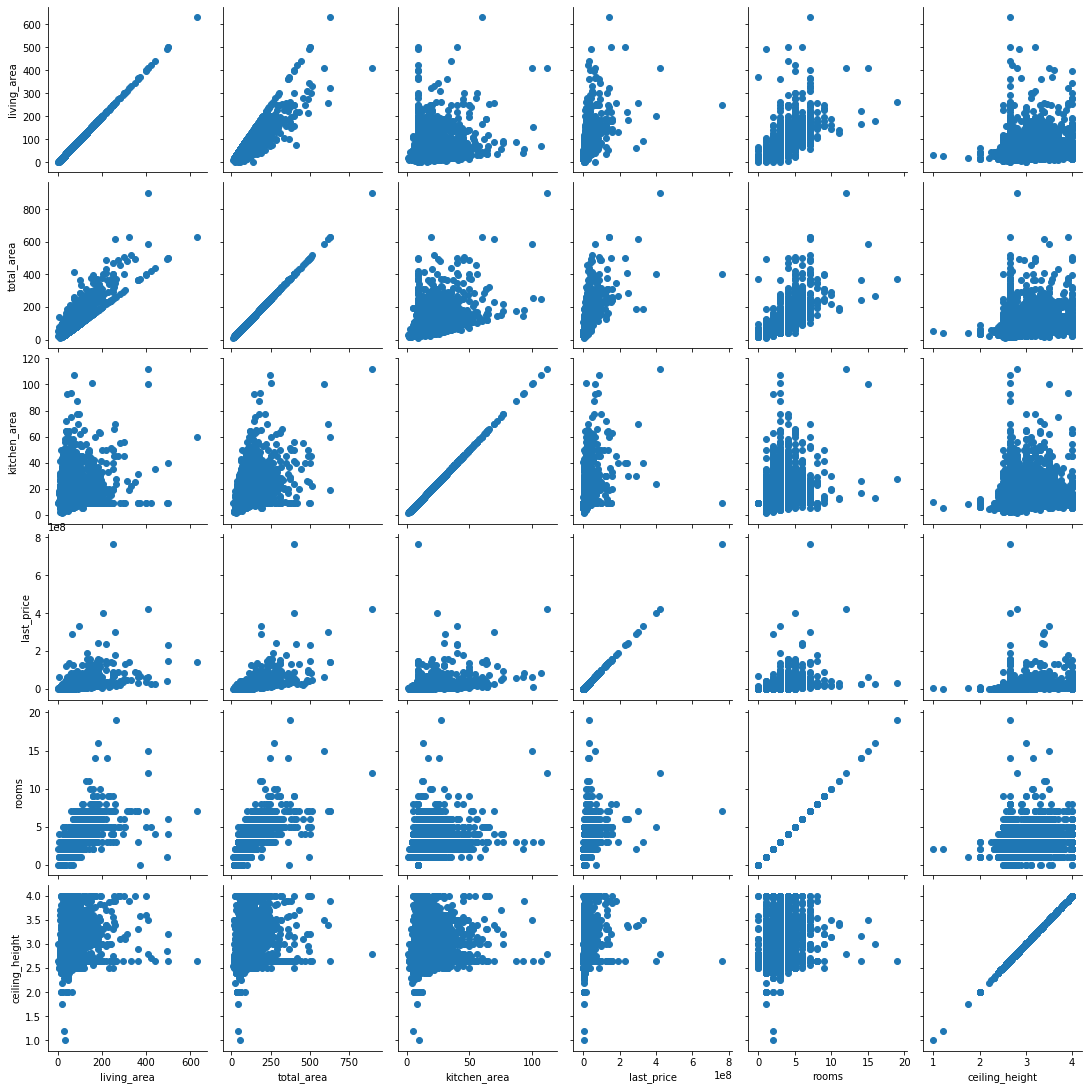

In [68]:
#iris = sns.load_dataset("iris")
g = sns.PairGrid(flat_table_r)
g.map(plt.scatter);

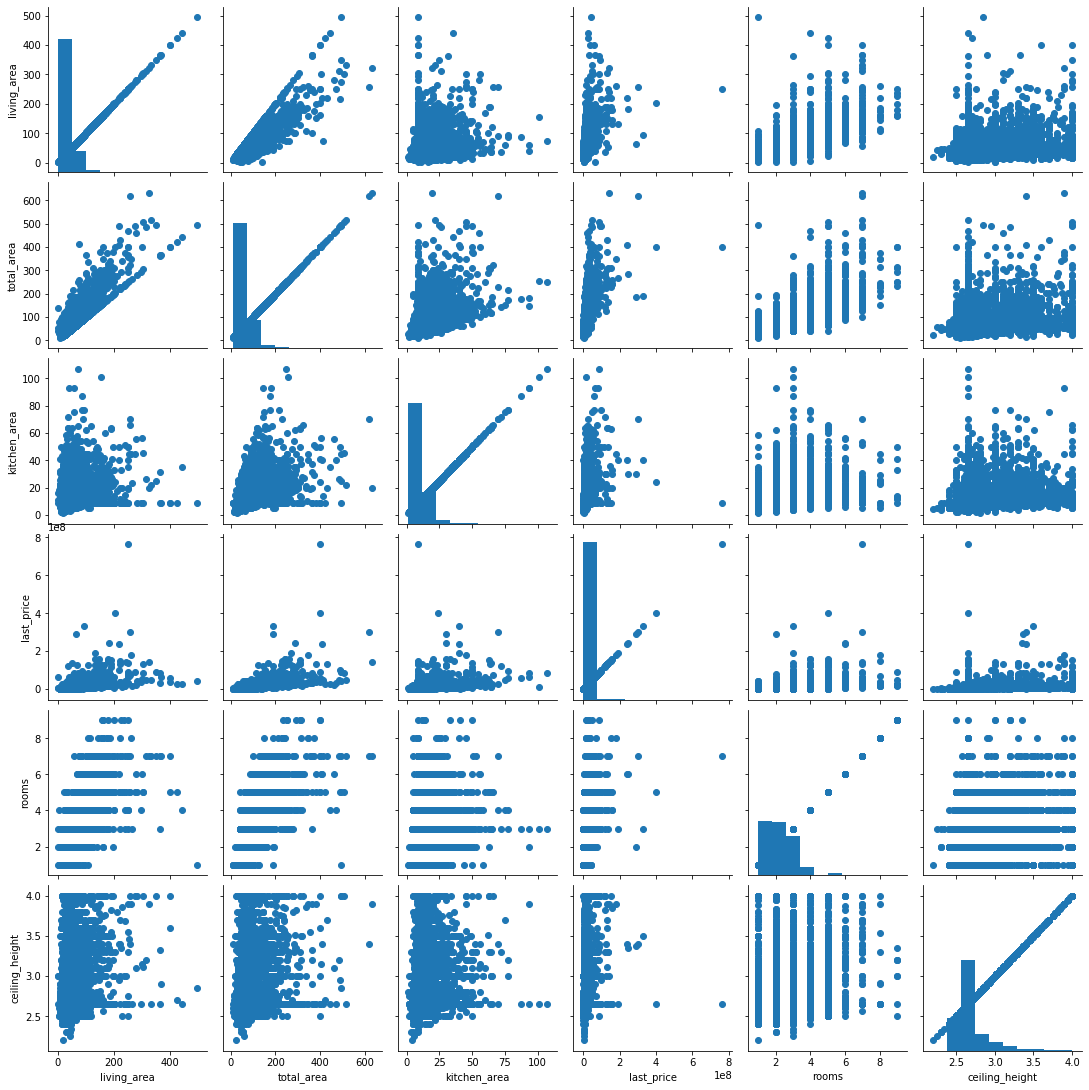

In [69]:
#Потолков в 1м быть не должно, если такие объявления и есть то нужно от них избавиться и избавимся от выбросов в общей площади
flat_table = flat_table.query('ceiling_height > 2 and total_area < 700 and living_area < 500 and 0 < rooms < 10')
g = sns.PairGrid(flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']])
g.map_diag(plt.hist)
g.map(plt.scatter);

In [70]:
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']].describe()
flat_table['last_price_mln'] = flat_table['last_price']/1000000

In [71]:
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].corr()

,living_area,total_area,kitchen_area,last_price_mln,rooms,ceiling_height
living_area,1.000000,0.895974,0.348012,0.534003,0.765385,0.337629
total_area,0.895974,1.000000,0.559610,0.634059,0.761324,0.395090
kitchen_area,0.348012,0.559610,1.000000,0.424716,0.244399,0.321759
last_price_mln,0.534003,0.634059,0.424716,1.000000,0.359569,0.290992
rooms,0.765385,0.761324,0.244399,0.359569,1.000000,0.247903
ceiling_height,0.337629,0.395090,0.321759,0.290992,0.247903,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016A45BE0E10>]],
      dtype=object)

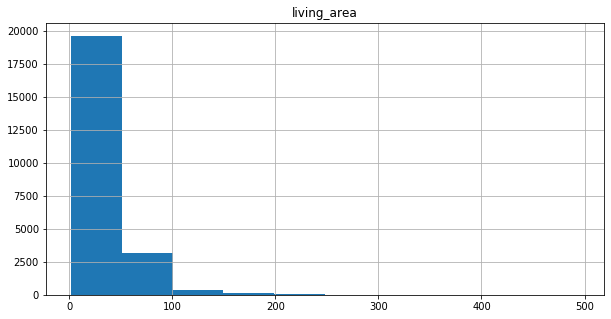

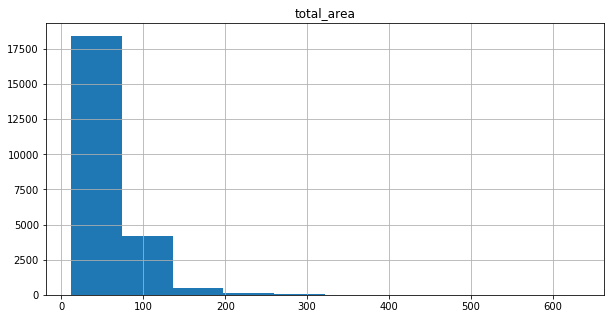

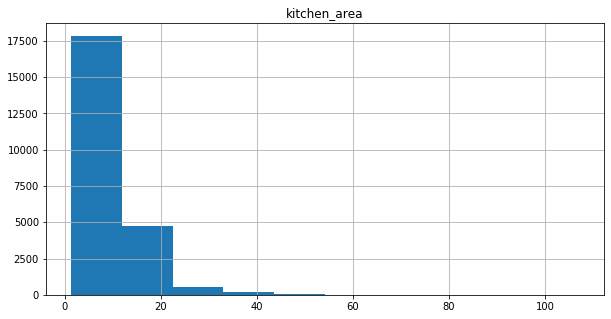

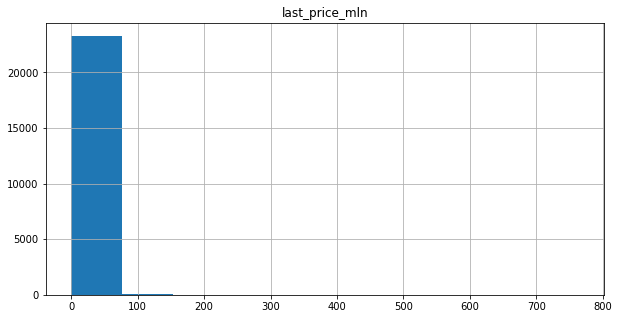

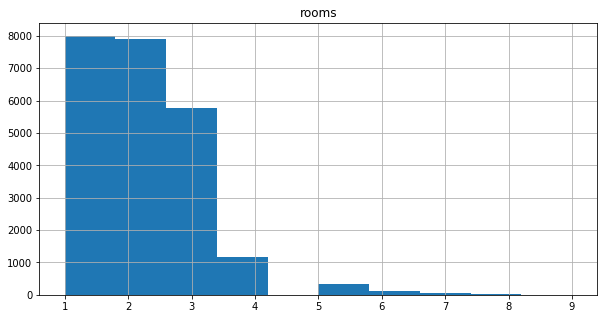

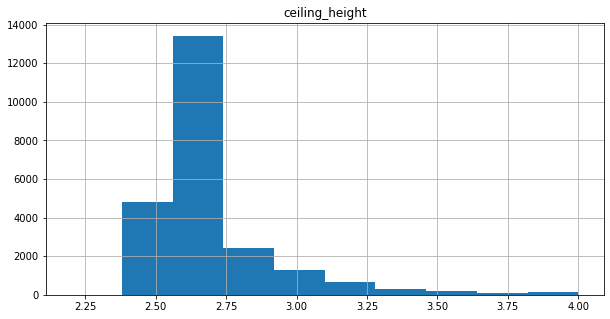

In [72]:
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].hist('living_area')
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].hist('total_area')
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].hist('kitchen_area')
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].hist('last_price_mln')
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].hist('rooms')
flat_table.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].hist('ceiling_height')

In [73]:
flat_table['last_price_mln'].describe()

count    23343.000000
mean         6.518916
std         10.413196
min          0.012190
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

In [74]:
elit = flat_table.query('last_price_mln >= 15')
good = flat_table.query('last_price_mln < 15')
elit.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_cost_per_metr,new_day_start,new_month_start,new_year_start,new_part_area,new_part_area_kitchen,last_price_mln
count,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,12.141803,3.115428e+07,151.810721,3.710656,2.981557,9.127049,93.932582,5.794262,21.525525,0.566393,27724.661475,7404.379508,1.143443,478.404098,1.359836,442.634426,201.375410,2.073497e+05,2.509016,6.429508,2017.147541,0.612559,0.157493,31.154276
std,6.809157,3.612018e+07,72.020538,1.433475,0.362891,5.442315,55.854557,4.367769,12.663466,1.123112,8327.883230,5921.786399,0.982161,333.314800,1.137414,221.066887,273.416968,1.376588e+05,1.723481,3.565965,1.220364,0.179449,0.094356,36.120180
min,0.000000,1.500000e+07,25.000000,1.000000,2.500000,2.000000,3.000000,1.000000,5.000000,0.000000,9222.000000,181.000000,0.000000,20.000000,0.000000,16.000000,0.000000,4.340278e+04,0.000000,1.000000,2014.000000,0.021583,0.018417,15.000000
25%,6.000000,1.724400e+07,107.000000,3.000000,2.650000,5.000000,57.737500,3.000000,13.000000,0.000000,22968.750000,4263.000000,0.000000,335.000000,0.000000,267.000000,0.000000,1.354334e+05,1.000000,3.000000,2017.000000,0.500919,0.094909,17.244000
50%,13.000000,2.181090e+07,134.000000,3.000000,3.000000,7.000000,80.000000,4.000000,18.000000,0.000000,26055.000000,5743.500000,1.000000,460.000000,1.000000,502.000000,90.000000,1.722245e+05,3.000000,6.000000,2017.000000,0.586548,0.132578,21.810900
75%,19.000000,3.016250e+07,172.000000,4.000000,3.200000,12.000000,112.000000,7.000000,26.000000,1.000000,31790.250000,8904.750000,2.000000,525.250000,2.000000,502.000000,298.000000,2.344805e+05,4.000000,10.000000,2018.000000,0.687522,0.188266,30.162500
max,50.000000,7.630000e+08,631.200000,9.000000,4.000000,26.000000,494.100000,25.000000,107.000000,5.000000,70016.000000,51431.000000,3.000000,2905.000000,3.000000,1293.000000,1572.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.636986,763.000000


In [75]:
good.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_cost_per_metr,new_day_start,new_month_start,new_year_start,new_part_area,new_part_area_kitchen,last_price_mln
count,22123.000000,2.212300e+04,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000
mean,9.774398,5.160369e+06,55.346482,1.992723,2.681823,10.709081,33.571750,5.859739,9.807893,0.591828,28372.831849,13904.254848,0.434073,470.044976,0.792885,511.966234,154.407268,93341.806493,2.569136,6.394296,2017.382272,0.597639,0.189855,5.160369
std,5.588466,2.684656e+06,21.716349,0.932294,0.194106,6.612677,16.934869,4.877459,4.088941,0.950740,11230.891986,7652.083050,0.716556,194.122167,0.799404,168.528550,209.717442,30941.050152,1.792648,3.487923,1.027207,0.153244,0.072831,2.684656
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,208.000000,0.000000,1.000000,0.000000,13.000000,0.000000,111.834862,0.000000,1.000000,2014.000000,0.038462,0.039565,0.012190
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.100000,0.000000,20890.000000,11247.000000,0.000000,455.000000,0.000000,502.000000,23.000000,75079.872204,1.000000,3.000000,2017.000000,0.500000,0.135714,3.400000
50%,9.000000,4.500000e+06,50.500000,2.000000,2.650000,9.000000,30.400000,4.000000,9.100000,0.000000,26726.000000,11667.000000,0.000000,460.000000,1.000000,502.000000,73.000000,93314.763231,3.000000,6.000000,2017.000000,0.579032,0.175000,4.500000
75%,14.000000,6.300000e+06,65.900000,3.000000,2.700000,16.000000,42.600000,8.000000,11.000000,1.000000,34620.000000,15500.000000,1.000000,460.000000,1.000000,502.000000,195.000000,110769.230769,4.000000,10.000000,2018.000000,0.656716,0.234260,6.300000
max,50.000000,1.500000e+07,320.000000,7.000000,4.000000,60.000000,238.260000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,6.000000,12.000000,2019.000000,1.000000,0.787879,14.999999


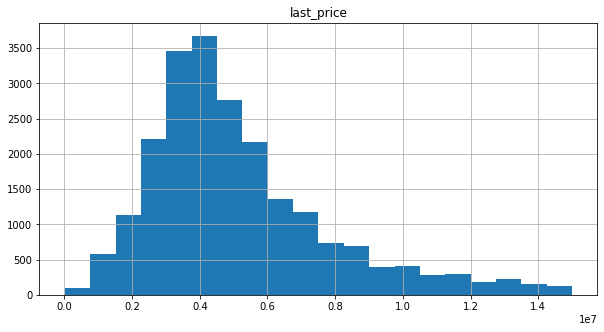

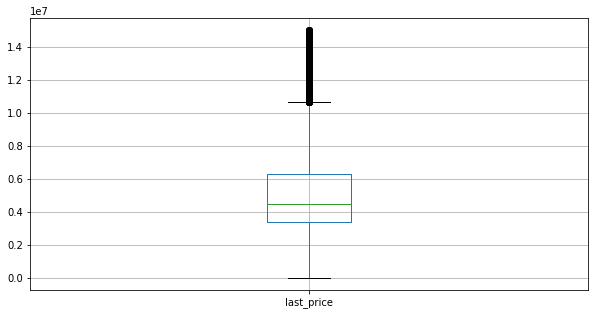

In [76]:
good.hist('last_price', bins = 20)
plt.show()
good.boxplot('last_price')

Исследовав цену продаж, лучше избавиться от слишком низких цен, которые выбиваются из общего распределения и слишком высоких. Это можно сделать, т.к. объём таких записей несуществен менее 1%. 

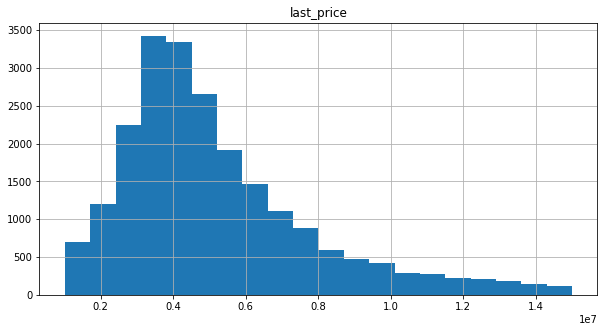

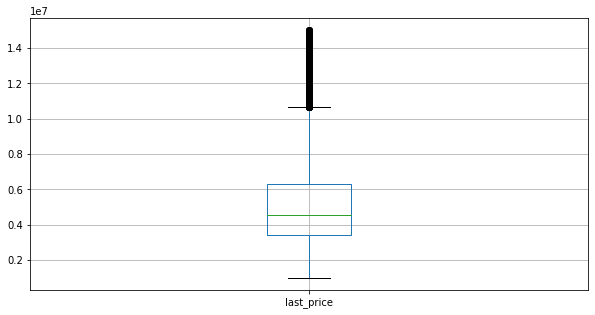

In [77]:
good = good.query('last_price > 1000000 and kitchen_area < 80 and total_area < 200')
#уберём подозрительные выбросы, которые выделяются на фоне вариационного раяда признаков по площади кухни и общей площади
good.hist('last_price', bins = 20)
plt.show()
good.boxplot('last_price')

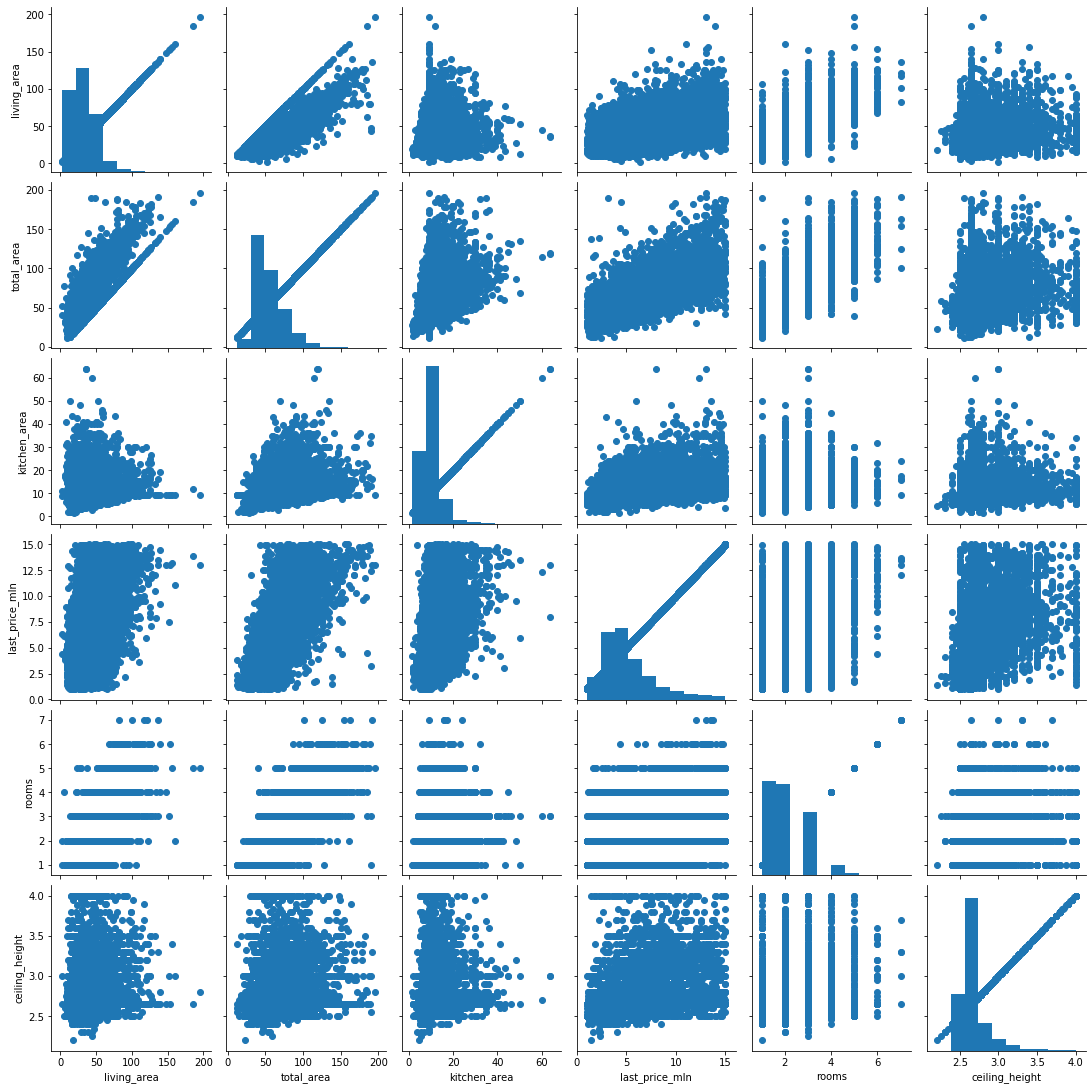

In [78]:
g = sns.PairGrid(good.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']])
g.map_diag(plt.hist)
g.map(plt.scatter);

In [79]:
good.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_cost_per_metr,new_day_start,new_month_start,new_year_start,new_part_area,new_part_area_kitchen,last_price_mln
count,21866.000000,2.186600e+04,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000,21866.000000
mean,9.791228,5.204429e+06,55.392953,1.994466,2.682333,10.784689,33.560162,5.895500,9.824953,0.595354,28387.693268,13934.154989,0.438809,470.179640,0.790497,512.114013,154.716912,94180.143235,2.565581,6.398198,2017.379996,0.596707,0.189928,5.204429
std,5.593755,2.652602e+06,21.319041,0.931211,0.194485,6.608715,16.702508,4.887971,4.039717,0.953760,11291.235585,7688.381786,0.718977,195.211927,0.803299,169.462289,210.018185,30112.036903,1.792410,3.488217,1.027889,0.152674,0.072917,2.652602
min,0.000000,1.010000e+06,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,208.000000,0.000000,1.000000,0.000000,13.000000,0.000000,10507.246377,0.000000,1.000000,2014.000000,0.038462,0.043524,1.010000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.100000,0.000000,20759.750000,11247.000000,0.000000,455.000000,0.000000,502.000000,23.250000,76000.000000,1.000000,3.000000,2017.000000,0.500000,0.135640,3.400000
50%,9.000000,4.534000e+06,50.700000,2.000000,2.650000,9.000000,30.500000,4.000000,9.100000,0.000000,26726.000000,11740.000000,0.000000,460.000000,1.000000,502.000000,73.000000,93627.786624,3.000000,6.000000,2017.000000,0.578462,0.175000,4.534000
75%,14.000000,6.300000e+06,66.000000,3.000000,2.700000,16.000000,42.700000,8.000000,11.000000,1.000000,34836.000000,15542.000000,1.000000,460.000000,1.000000,502.000000,195.000000,111000.000000,4.000000,10.000000,2018.000000,0.655556,0.234497,6.300000
max,50.000000,1.500000e+07,196.000000,7.000000,4.000000,60.000000,196.000000,33.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,6.000000,12.000000,2019.000000,1.000000,0.787879,14.999999


In [80]:
good.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height']].corr()

,living_area,total_area,kitchen_area,last_price_mln,rooms,ceiling_height
living_area,1.000000,0.855126,0.191380,0.585508,0.805205,0.239357
total_area,0.855126,1.000000,0.459824,0.746399,0.801325,0.318805
kitchen_area,0.191380,0.459824,1.000000,0.508879,0.104610,0.272265
last_price_mln,0.585508,0.746399,0.508879,1.000000,0.487484,0.385412
rooms,0.805205,0.801325,0.104610,0.487484,1.000000,0.149224
ceiling_height,0.239357,0.318805,0.272265,0.385412,0.149224,1.000000


Корреляция по высоте потолка уменьшилась после обрезки подозрительных данных, но в тоже время корреляция по пирсону для площади иколичества комнат выросла, так же выросла корреляци площади и цены, что вполне логично. Отдельно стоит проанализировать площади.

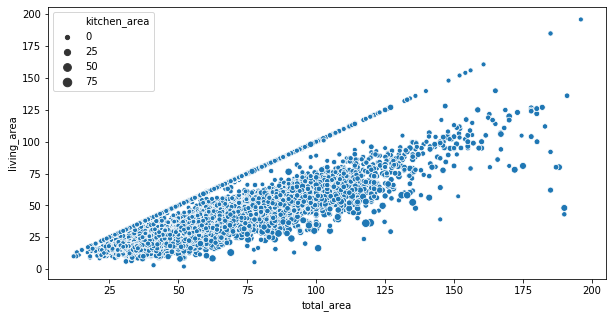

In [81]:
square = good.loc[:,['total_area','living_area','kitchen_area']]
ax = sns.scatterplot(x="total_area", y="living_area", size="kitchen_area", data=square)

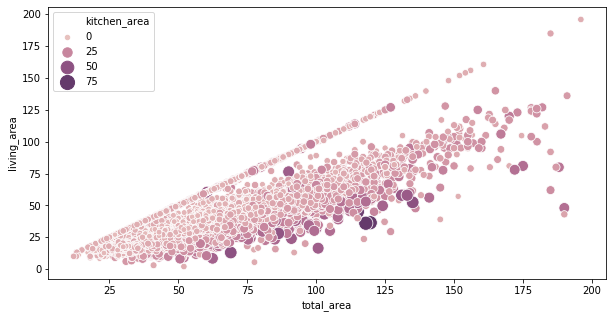

In [82]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_area", y="living_area",
                     hue="kitchen_area", size="kitchen_area",
                     palette=cmap,
                     data=square,sizes=(20, 200))

Проявились очень странные выбросы связанные с площадью кухни, очистим датасет от подобных выбросов, когда площать кухни практически равно всей площади.

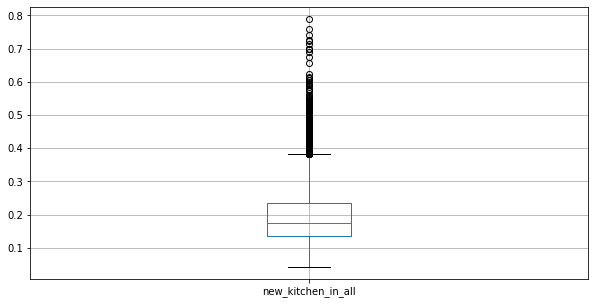

In [83]:
good['new_kitchen_in_all'] = good['kitchen_area'] / good['total_area']
good.boxplot('new_kitchen_in_all')

In [84]:
good[good['new_kitchen_in_all'] > 0.4]['new_kitchen_in_all'].count()

285

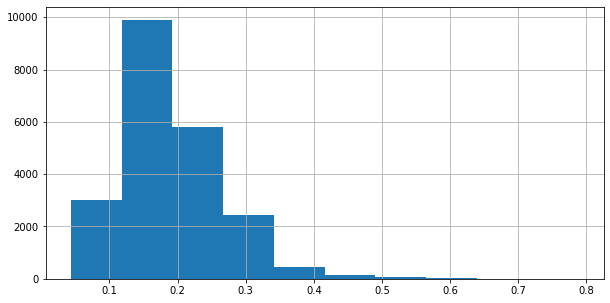

In [85]:
good['new_kitchen_in_all'].hist()

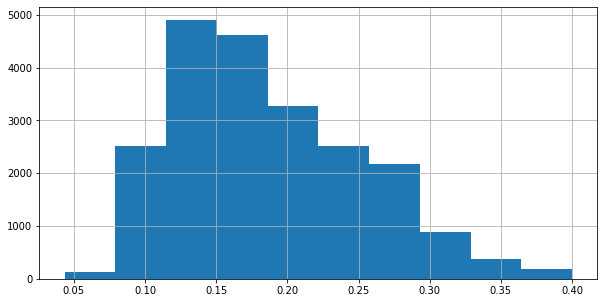

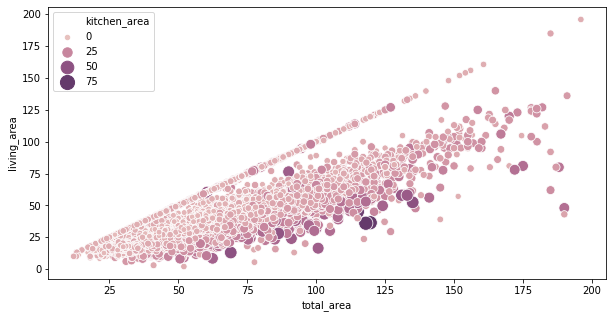

In [86]:
good = good.query('new_kitchen_in_all < 0.4')
good['new_kitchen_in_all'].hist()
plt.show()
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_area", y="living_area",
                     hue="kitchen_area", size="kitchen_area",
                     palette=cmap,
                     data=square,sizes=(20, 200))

##### Вывод
Исследование площадей, стоимости, количества комнат - завершено. подозрительные данные исключены из выборки.

##### Задание:
"Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

In [87]:
pivot = good.pivot_table(index=['new_year_start'],\
                         values='days_exposition',\
                         aggfunc=['mean','median'])
pivot.columns = ['mean_days','median_days']
pivot

,mean_days,median_days
new_year_start,,
2014,843.666667,858
2015,619.624390,558
2016,313.328979,225
2017,152.520145,97
2018,83.465857,59
2019,11.907118,0


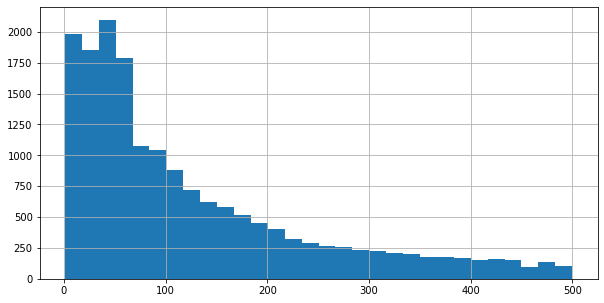

In [88]:
good['days_exposition'].hist(bins=30, range=(1,500))
good = good.query('days_exposition != 0')

In [89]:
good['days_exposition'].describe()

count    18871.000000
mean       176.784431
std        215.555915
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [90]:
(good
 .query('days_exposition > 1000')
 .sort_values(by='days_exposition', ascending=False)
 .head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area,new_cost_per_metr,new_day_start,new_month_start,new_year_start,new_level,new_part_area,new_part_area_kitchen,last_price_mln,new_kitchen_in_all
18843,11,3500000.0,48.20,2014-12-15,2,2.50,5,27.40,2,False,False,False,7.70,3,деревня Новое Девяткино,26726,11247,0,455,1,502,1580,q2,72614.107884,0,12,2014,другой,0.568465,0.159751,3.5,0.159751
9553,11,10600000.0,80.00,2014-12-09,3,2.85,17,44.00,9,False,False,False,15.00,0,Санкт-Петербург,17101,17110,0,460,0,502,1553,q4,132500.000000,1,12,2014,другой,0.550000,0.187500,10.6,0.187500
1885,2,13300000.0,79.60,2014-12-09,2,3.00,8,42.70,7,False,False,False,18.00,0,Санкт-Петербург,39393,11096,1,537,0,502,1513,q4,167085.427136,1,12,2014,другой,0.536432,0.226131,13.3,0.226131
6691,3,4400000.0,42.98,2014-12-12,1,2.65,5,18.72,1,False,False,False,11.31,0,Пушкин,19715,30358,1,439,3,232,1512,q2,102373.196836,4,12,2014,первый,0.435551,0.263146,4.4,0.263146
20969,18,13300000.0,133.00,2015-02-11,4,3.00,5,58.00,2,False,False,False,45.00,0,Санкт-Петербург,24653,5032,0,460,1,534,1512,q4,100000.000000,2,2,2015,другой,0.436090,0.338346,13.3,0.338346


##### Вывод:
В среднем продажи идут порядка 98 дней, если признак days_exposition находится в диапазоне 0-1, то данные продажи подозрительны и вероятнее всего продажами и неявляются, вероятнее всего продавец просто снял объявление. Когда объявление висит дольше 232 дней то продажа становится слишком долгой (по 3-му квантилю). также обнаружен интересный факт, что с каждым годом продажа становится быстрее.

##### Задание: 
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*.

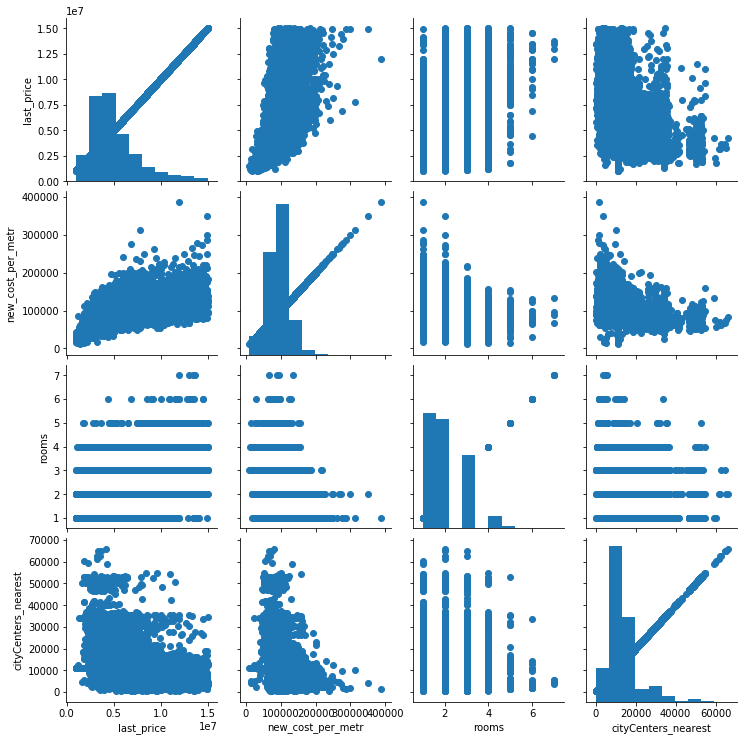

,last_price,new_cost_per_metr,rooms,cityCenters_nearest
last_price,1.000000,0.604645,0.495360,-0.234677
new_cost_per_metr,0.604645,1.000000,-0.187956,-0.185702
rooms,0.495360,-0.187956,1.000000,-0.101451
cityCenters_nearest,-0.234677,-0.185702,-0.101451,1.000000


In [91]:
good_1 = good.loc[:,['last_price','new_cost_per_metr','new_level','rooms','cityCenters_nearest','locality_name']]
g = sns.PairGrid(good_1)
g.map_diag(plt.hist)
g.map(plt.scatter);
plt.show()
good_1.corr()

In [92]:
pivot = good.pivot_table(index=['new_year_start'],\
                         values='days_exposition',\
                         aggfunc=['mean','median'])
pivot.columns = ['mean_days','median_days']
pivot

,mean_days,median_days
new_year_start,,
2014,915.468085,893.5
2015,644.786802,574.0
2016,319.398305,232.0
2017,156.715445,102.0
2018,92.937918,62.0
2019,30.666667,23.0


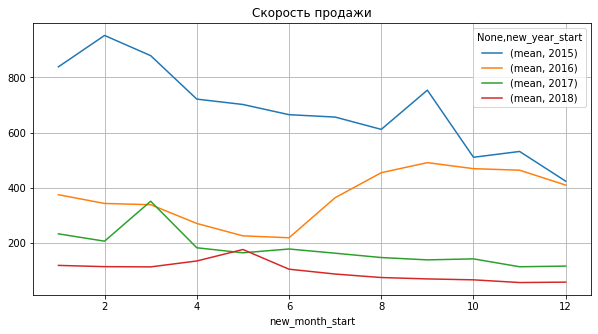

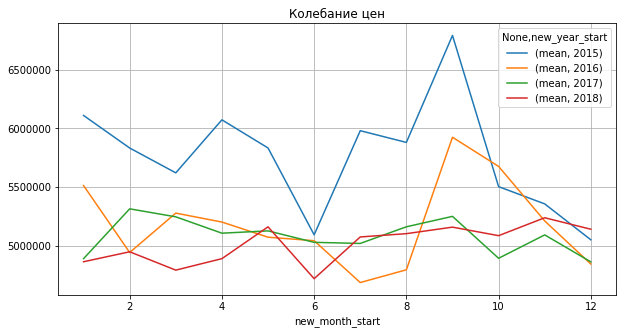

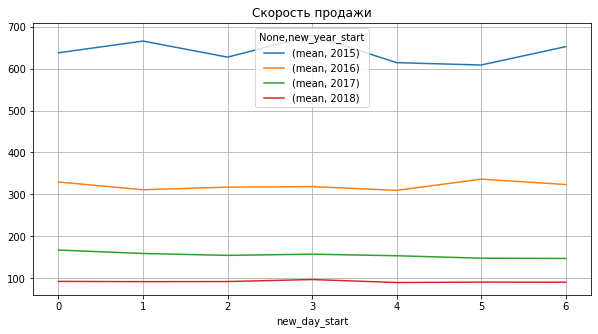

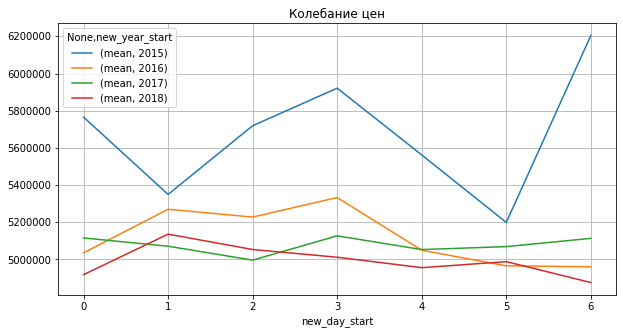

In [93]:
pivot = (good
         .query('2014 < new_year_start < 2019')
         .pivot_table(index=['new_month_start'],columns='new_year_start',values='days_exposition',aggfunc=['mean'])
         .plot(grid=True, title='Скорость продажи'))

pivot = good.query('2014 < new_year_start < 2019').pivot_table(index=['new_month_start'],\
                         columns='new_year_start',\
                         values='last_price',\
                         aggfunc=['mean']).plot(grid=True, title='Колебание цен')

pivot = good.query('2014 < new_year_start < 2019').pivot_table(index=['new_day_start'],\
                         columns='new_year_start',\
                         values='days_exposition',\
                         aggfunc=['mean']).plot(grid=True, title='Скорость продажи')
pivot = good.query('2014 < new_year_start < 2019').pivot_table(index=['new_day_start'],\
                         columns='new_year_start',\
                         values='last_price',\
                         aggfunc=['mean']).plot(grid=True, title='Колебание цен')

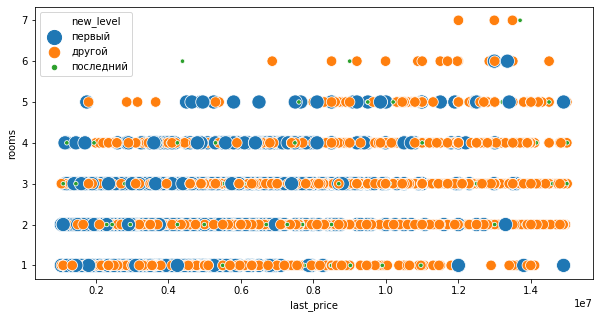

,count,median,mean
,last_price,last_price,last_price
new_level,,,
другой,14007,4600000.0,5.291050e+06
первый,2291,3850000.0,4.266522e+06
последний,2573,4170000.0,4.845999e+06


In [94]:
#ax = sns.scatterplot(x="new_level", y="last_price", data=good)

ax = sns.scatterplot(x="last_price", y="rooms",
                     hue="new_level", size="new_level",
                     data=good,sizes=(20, 200))
plt.show()
good_1.pivot_table(index='new_level',values='last_price',aggfunc=['count','median','mean'])


In [95]:
good_2 = good.pivot_table(index='locality_name',values=['last_price','new_cost_per_metr'],aggfunc=['median','count'])
good_2
good_2.columns=['median_price','median_cost_per_metr','count_price','count_cost_per_metr']
good_2 = good_2.sort_values(by='count_price', ascending=False)
good_2.head(10)

,median_price,median_cost_per_metr,count_price,count_cost_per_metr
locality_name,,,,
Санкт-Петербург,5150000.0,101489.368444,12462,12462
посёлок Мурино,3457000.0,83661.065427,473,473
посёлок Шушары,3950000.0,75757.569444,396,396
Всеволожск,3400000.0,65789.473684,329,329
Колпино,3600000.0,73820.928519,306,306
посёлок Парголово,4050000.0,91387.362637,294,294
Пушкин,4850000.0,97402.597403,285,285
деревня Кудрово,3800000.0,91618.217054,270,270
Гатчина,3050000.0,67187.500000,265,265


Населенный пункт с самым __дорогой__ недвижимостью

In [96]:
good_2.sort_values(by='median_price', ascending=False).head(1)

,median_price,median_cost_per_metr,count_price,count_cost_per_metr
locality_name,,,,
посёлок Александровская,8725000.0,70262.807084,2,2


Населенный пункт с самой __дешёвой__ недвижимостью

In [97]:
good_2.sort_values(by='median_price', ascending=False).tail(1)

,median_price,median_cost_per_metr,count_price,count_cost_per_metr
locality_name,,,,
поселок Житково,1050000.0,15648.28614,1,1


##### Вывод
Явных корреляционных зависимостей нет, присутствуют слабо выраженные, но т.к. они меньше 0.5 о них нет смыла рассуждать.
Цена засит от этажа, т.е. ценник жилья на первом и последнем схожи и они ниже ценника на других этажах. Самым дорогим населенным пунктом является - "посёлок Александровская", а дешёвым - "посёлок Житково". 

Скорость продажи от начала года падает,самые высокие цены устанавливаются в сентябре и экстремального минимума цена достигают 6 и 12 месяца, максимальные цены за жильё чаще выставляются во вторник и четверг.


##### Задание:
"Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

In [98]:
good['new_cost_per_km'] = good['last_price'] / good['cityCenters_nearest']
pivot = good.pivot_table(index='locality_name',\
                         values=['new_cost_per_km','new_cost_per_metr'],\
                         aggfunc=['mean'])

pivot.columns = ['new_cost_per_km','new_cost_per_metr']
pivot = pivot.sort_values(by='new_cost_per_km', ascending=False)
pivot

,new_cost_per_km,new_cost_per_metr
locality_name,,
Санкт-Петербург,782.442611,105421.933403
деревня Юкки,449.008625,78315.160955
деревня Глинка,426.780475,46601.941748
городской посёлок Рощино,425.002223,88831.072291
коттеджный поселок Счастье,413.443585,64583.333333
...,...,...
Кронштадт,79.382316,79227.434927
посёлок Щеглово,76.249083,52859.865278
Ломоносов,70.142539,71328.330792


In [99]:
flat_table_copy_copy['new_cost_per_metr'] = flat_table_copy_copy['last_price']/flat_table_copy_copy['total_area']
flat_table_copy_copy['new_cost_per_km'] = flat_table_copy_copy['last_price'] / flat_table_copy_copy['cityCenters_nearest']

pivot = flat_table_copy_copy.pivot_table(index='locality_name',\
                                 values=['new_cost_per_km','new_cost_per_metr'],
                                 aggfunc=['mean'])
pivot.columns = ['new_cost_per_km','new_cost_per_metr']
pivot = pivot.sort_values(by='new_cost_per_km', ascending=False)
pivot

,new_cost_per_km,new_cost_per_metr
locality_name,,
Санкт-Петербург,1518.519591,114849.008794
деревня Хязельки,978.038588,47826.086957
деревня Бор,924.477638,59348.578154
деревня Заневка,425.135592,77662.569255
деревня Мистолово,424.123201,98549.976709
...,...,...
посёлок станции Свирь,51.124744,11481.481481
поселок Совхозный,46.012270,12629.129129
деревня Чудской Бор,44.456299,16286.644951


##### Вывод
Сравнив результат до и после преобразования получаем, что "посёлок Александровская" будет относиться к центру, т.к. тут одна из самых высоких цен на жильё после Питера. Интересно, что в результате замены расстояния до центра искозились значения, поэтому решение о входящем в центр населеном пункте выбрано из необработанного dataframe.

##### Задание:
"Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [100]:
good.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_area,new_cost_per_metr,new_day_start,new_month_start,new_year_start,new_level,new_part_area,new_part_area_kitchen,last_price_mln,new_kitchen_in_all,new_cost_per_km
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,455,0,502,81,q2,82920.792079,1,12,2018,первый,0.460396,0.272277,3.350,0.272277,180.078482
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,q3,92785.714286,3,8,2015,другой,0.612500,0.148214,5.196,0.148214,372.927582
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,26726,11247,0,455,1,502,55,q2,95065.789474,0,9,2018,другой,0.473684,0.299342,2.890,0.299342,256.957411
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996,19143,0,733,0,502,155,q2,99195.710456,3,11,2017,другой,0.284182,0.386059,3.700,0.386059,193.282140
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,26726,11247,0,455,1,502,189,q2,87454.764777,2,5,2018,другой,0.465320,0.265682,2.900,0.265682,257.846537


In [101]:
good_3 = (good
 .query('locality_name == "Санкт-Петербург"')
 .loc[:,['total_area','last_price','rooms', 'floor','ceiling_height','new_month_start','cityCenters_nearest','new_cost_per_metr']]
)
good_4 = good_3.corr()
good_4[['last_price']]

,last_price
total_area,0.814496
last_price,1.000000
rooms,0.545521
floor,0.045801
ceiling_height,0.389437
new_month_start,0.006611
cityCenters_nearest,-0.398557
new_cost_per_metr,0.449424


In [105]:
#(flat_table_copy_copy
# .query('locality_name == "Санкт-Петербург"')
# .loc[:,['total_area','last_price','rooms', 'floor','ceiling_height','new_month_start','cityCenters_nearest','new_cost_per_metr']]
# .corr()
#)

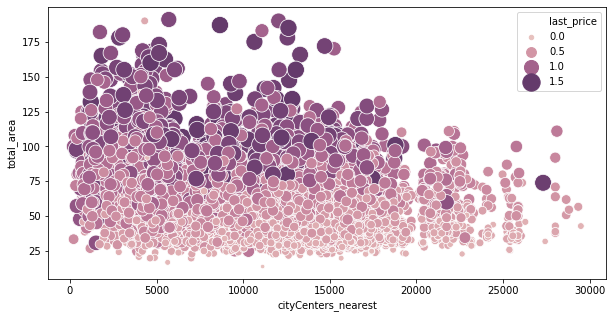

In [103]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cityCenters_nearest", y="total_area",
                     hue="last_price", size="last_price",
                     palette=cmap,
                     data=good_3,sizes=(20, 300))

##### Вывод:
Регрессия выдала интересный результат, но данный результат касательно зависимости удаленности от площади и от цены лучше всего заметить на графике. Так график даёт явное понимание, что площадь-стоимость-удалённость явно зависящие показатели, но необходимо заметить вся дорогостоящая недвижимость находится от 0 до 20 км от центра. Хоть регрессионной анализ и показал слабую, но обратную зависимость стоимости от растояния до центра, стоит учесть, что в прцессе очистки могли исказиться данные.
На основе графика можно выделить несколько групп по удаленности:
* от 0 до 6 км
* от 6 до 20 км
* от 20 до 24 км
* от 25 до 26 км
* от 27 до 29 км

данные группы на графике выделяются по плотностям. 
На стоимость явно влияет площадь, количество комнат, удалённость от центра и в малой степенивысота потолков.


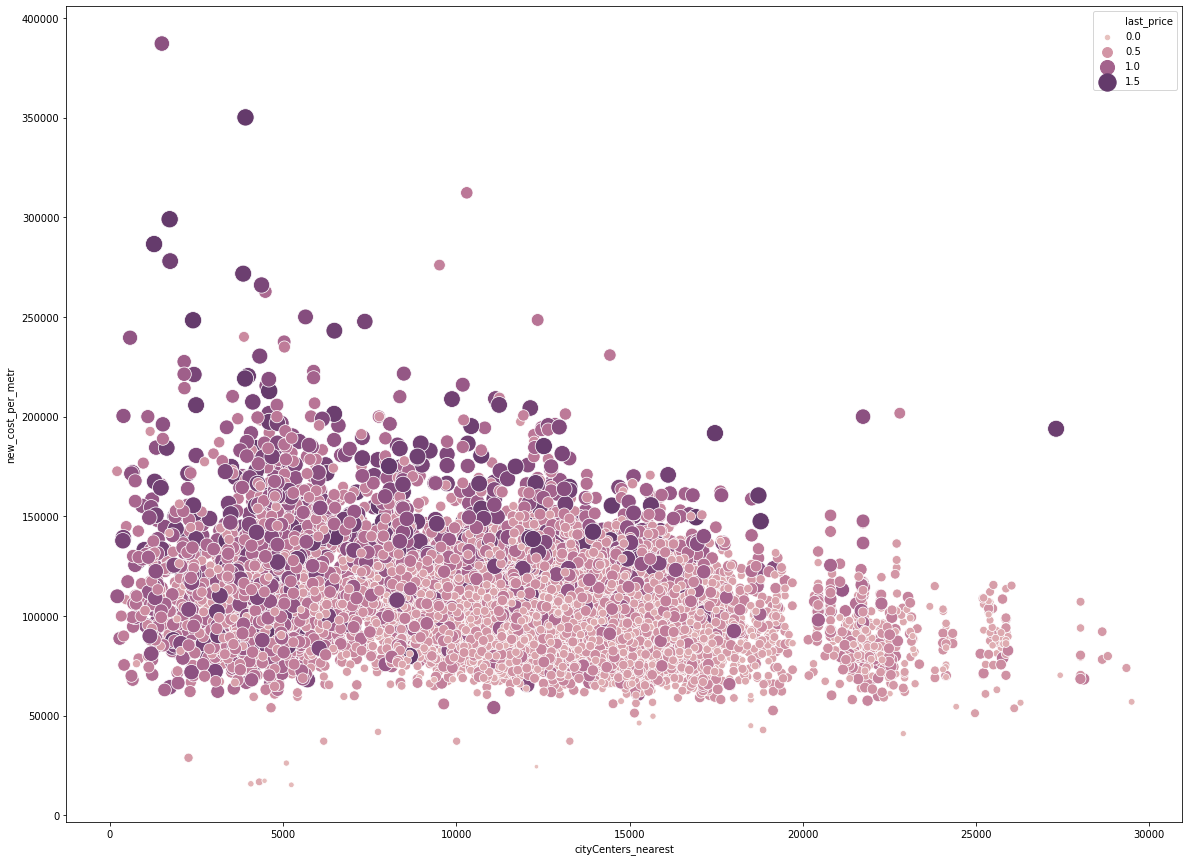

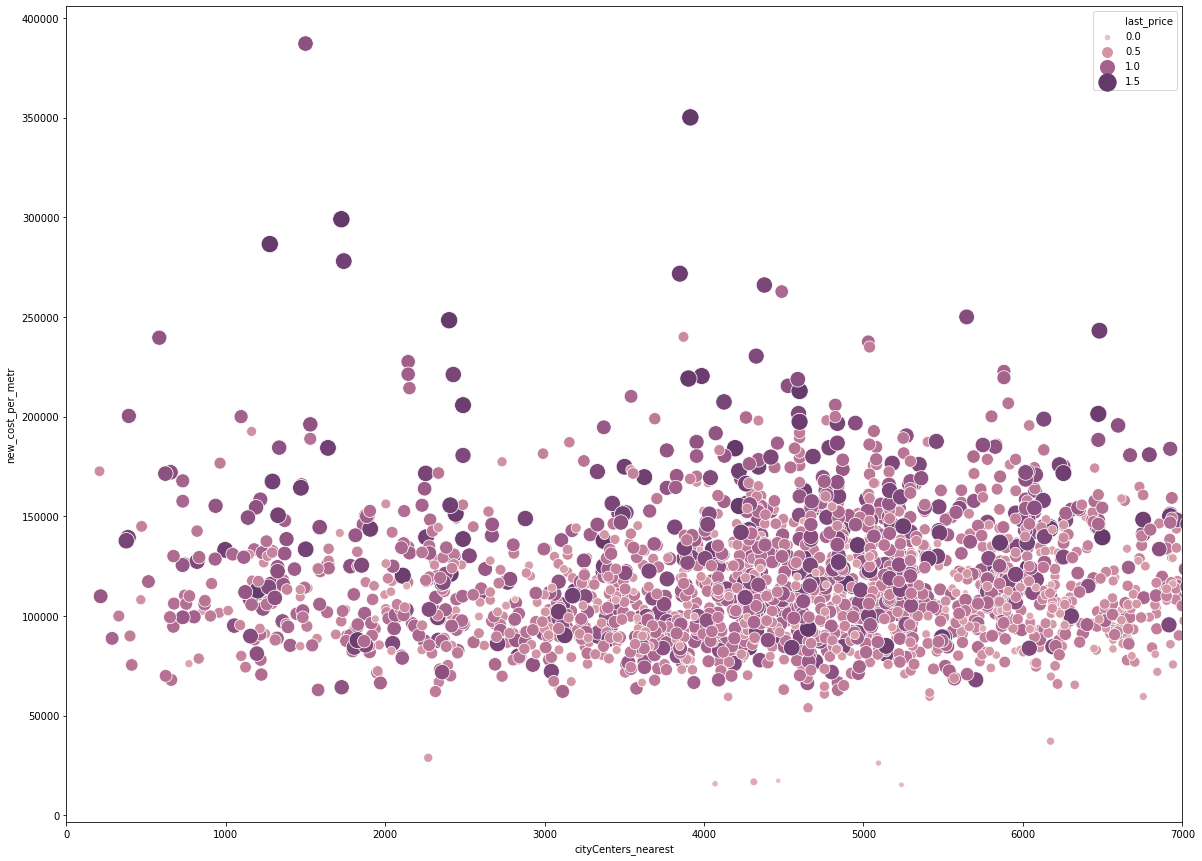

In [104]:
plt.figure(figsize=(20,15))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cityCenters_nearest", y="new_cost_per_metr",
                     hue="last_price", size="last_price",
                     palette=cmap,
                     data=good_3,sizes=(20, 300))

plt.figure(figsize=(20,15))
plt.xlim(0,7000)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cityCenters_nearest", y="new_cost_per_metr",
                     hue="last_price", size="last_price",
                     palette=cmap,
                     data=good_3,sizes=(20, 300))


### Вывод

График напоминает прямоугольный треугольник, прослеживается четкая нижняя граница, ниже которой цены за квадратный метр почти не опускаются - 50 тыс. за кв.метр, соответственно цена за квадратный метр уменьшается по мере удаления от центральной части и движения к периферии, как и площащадь, что видно по графику. В центре также продаются квартиры с большей площадью и по мере движения площадь уменьшается. Можно провести ассимптоту по значению удаленности - 6км, это и будет граница центра города. Можно заметить при рассмторении центральной части, что она не однородна, что плотность данных от 3км до 5.5 км выше относительно данных в области от 0 до 3км. Данный вывод вполне логичен, т.к. в центре имеются исторические здания и квадратура таких квартир превосходит современные.

### Шаг 5. Общий вывод

---
В процессе работы использовал д

#####  Часть 1  - Откройте файл с данными и изучите общую информацию
Была получена первичная информация о файле данных, и поставена перичная задача по приведению типов данных к нужным форматам.

* total_images — число фотографий квартиры в объявлении (int64)
* last_price — цена на момент снятия с публикации  (float64)
* total_area — площадь квартиры в квадратных метрах  (float64)
* first_day_exposition — дата публикации  (type date)
* rooms — число комнат (int64)
* ceiling_height — высота потолков (м) (float64)
* floors_total — всего этажей в доме (int64) 
* living_area — жилая площадь в квадратных метрах(м²)(float64)
* floor — этаж (int64)
* is_apartment — апартаменты (булев тип) (bool)
* studio — квартира-студия (булев тип) (bool)
* open_plan — свободная планировка (булев тип) (bool)
* kitchen_area — площадь кухни в квадратных метрах (м²) (float64)
* balcony — число балконов (int64)
* locality_name — название населённого пункта (text)
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м) (float64)>
* cityCenters_nearest — расстояние до центра города (м) (float64)
* parks_nearest — расстояние до ближайшего парка (м) (float64)
* parks_around3000 — число парков в радиусе 3 км (int64)
* ponds_around3000 — число водоёмов в радиусе 3 км (int64)
* ponds_nearest — расстояние до ближайшего водоёма (м)(float64)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия) (int64)

-выше приведенные признаки необходимоскорректировать по типам данных исходя из их сущности.

---

#####  Часть 2  -  Предобработка данных
В столбцах ниже были обнаружены пропуски типа - Nan:

* is_apartment - пропущено: 20924 ;
* parks_nearest - пропущено: 15620 ;
* ponds_nearest - пропущено: 14589 ;
* balcony - пропущено: 11519 ;
* ceiling_height - пропущено: 9195 ;
* airports_nearest - пропущено: 5542 ;
* cityCenters_nearest - пропущено: 5519 ;
* parks_around3000 - пропущено: 5518 ;
* ponds_around3000 - пропущено: 5518 ;
* days_exposition - пропущено: 3181 ;
* kitchen_area - пропущено: 2278 ;
* living_area - пропущено: 1903 ;
* floors_total - пропущено: 86 ;
* locality_name - пропущено: 49 ;

Данные пропуски были проанализтированны с помощью boxplot и гистограм - визуально, метода describe() и corr() - аналитически.
Соответственно были пропуски устраненны и только после этого была произведена опрерация по корректировке типов данных. Пропуски явно разделились на технические, которые появились из-за некорректного поведения алгоритмов по обработке адресов и пользовательские - высота потолков (например). Картографические пропуски, которые зависили от адресов заполнил медианными значениями на основе локационных груп, т.к. адресов нет и выделить более точно принадлежность сложно на текущем этапе. Пропуски в наименовании локаций - удаленны вместе с объявлениями, т.к. невозможно с текущим бкграундом установить их принадлежность и самое главное - нет адресов. В реальном кейсе я бы запросил географические координаты.

#####  Часть 3 - Посчитайте и добавьте в таблицу:

Производные величины получены:
* цена квадратный метр;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

по этим величинам можно проводить анализ.

#####  Часть 4 - Проведите исследовательский анализ данных и выполните инструкции

1. Были изученны параметры: площадь, цена, число комнат, высота потолков. Сделаны гистограммы для каждого параметра.
    * Исследование площадей, стоимости, количества комнат - завершено. Подозрительные данные исключены из выборки.
2. Изучено время продажи квартиры. 
    * В среднем продажи идут порядка 98 дней, если признак days_exposition находится в диапазоне 0-1, то данные продажи подозрительны и вероятнее всего продажами и неявляются, вероятнее всего продавец просто снял объявление. Когда объявление висит дольше 232 дней то продажа становится слишком долгой (по 3-му квантилю). также обнаружен интересный факт, что с каждым годом продажа становится быстрее.
3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
    * 2
4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
    * Явных корреляционных зависимостей нет, присутствуют слабо выраженные, но т.к. они меньше 0.5 о них нет смыла рассуждать. Цена засит от этажа, т.е. ценник жилья на первом и последнем схожи и они ниже ценника на других этажах. Самым дорогим населенным пунктом является - "посёлок Александровская", а дешёвым - "посёлок Житково".
    * Скорость продажи от начала года падает,самые высокие цены устанавливаются в сентябре и экстремального минимума цена достигают 6 и 12 месяца, максимальные цены за жильё чаще выставляются во вторник и четверг.
5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.Ваша задача — выяснить, какая область входит в центр.
    * Сравнив результат до и после преобразования получаем, что "посёлок Александровская" будет относиться к центру, т.к. тут одна из самых высоких цен на жильё после Питера. Интересно, что в результате замены расстояния до центра искозились значения, поэтому решение о входящем в центр населеном пункте выбрано из необработанного dataframe.
7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
    * Регрессия выдала интересный результат, но данный результат касательно зависимости удаленности от площади и от цены лучше всего заметить на графике. Так график даёт явное понимание, что площадь-стоимость-удалённость явно зависящие показатели, но необходимо заметить вся дорогостоящая недвижимость находится от 0 до 20 км от центра. Хоть регрессионной анализ и показал слабую, но обратную зависимость стоимости от растояния до центра, стоит учесть, что в прцессе очистки могли исказиться данные. На основе графика можно выделить несколько групп по удаленности:
        * от 0 до 6 км - центр;
        * от 6 до 20 км - перифирийная часть;
        * от 20 до 24 км - перое областное кольцо;
        * от 25 до 26 км - второе областное кольцо;
        * от 27 до 29 км - третье областное кольцо;

    -данные группы на графике выделяются по __плотностям__. На стоимость явно влияет площадь, количество комнат, удалённость от центра и в малой степени высота потолков.
     
    * Построен график зависимости цены за квадратный метр и удаленности от График напоминает прямоугольный треугольник, прослеживается четкая нижняя граница, ниже которой цены за квадратный метр почти не опускаются - 50 тыс. за кв.метр, соответственно цена за квадратный метр уменьшается по мере удаления от центральной части и движения к периферии, как и площащадь, что видно по графику. В центре также продаются квартиры с большей площадью и по мере движения площадь уменьшается. Можно провести ассимптоту по значению удаленности - 6км, это и будет граница центра города. Можно заметить при рассмторении центральной части, что она не однородна, что плотность данных от 3км до 5.5 км выше относительно данных в области от 0 до 3км. Данный вывод вполне логичен, т.к. в центре имеются исторические здания и квадратура таких квартир превосходит современные. 